## **Assignment #2: Classification, Regression, Clustering, Evaluation**

<br>

### **Overview**

In this assignment, you'll level up your data science toolkit. While the first assignment focused on the data, on this one you will practice:

- Classification models

- Regression models

- Feature Engineering

- Evaluations

You’ll go from raw data to insights by building a full modeling pipeline, enhancing your dataset, and training different models.

This assignment will be completed individually.

### **Objectives**

You’ll gain hands-on experience in:
- Evaluation
- Classification
- Regression
- Dataset preparation
- Explore various data hubs
- Engineering meaningful features
- Communicating findings clearly - visually and verbally

<br><br>

### **Submission Guidelines**

1. Please note that this assignmnet must be submitted alone.
2. Link to your HugingFace Model.

Your HF model should include:
- README file: explanations, visuals, insights, etc.
- **Video**: Include the video of your presentation in the README file.
- **Python Notebook**: upload a copy of this notebook, with all of your coding work. Do not submit a Colab link; include the `.ipynb` file in the HF model.
- **ML Models:** Upload your models.

Note: Students may be randomly chosen to present their work in a quick online session with the T.A., typically lasting ±10 minutes. Similar to Peer Review.

<br><br>



### **Evaluation Criteria**

* **Data Handling & EDA (20%)**
  Thoughtful and thorough data cleaning; handling of missing values, outliers, duplicates, and more; well-chosen visualizations; clear statistical summaries; use of EDA to guide modeling choices.

* **Feature Engineering (20%)**
  Creative and effective feature creation, transformation, encoding, selection, scaling, and more; integration of clustering results as features; clear explanation of feature choices and their impact.

* **Model Training (20%)**
  Appropriate selection of models; correct train/test split; reproducible code; logical modeling workflow with a solid baseline and improvements post-feature engineering. An iterative process.

* **Evaluation & Interpretation (20%)**
  Use of relevant evaluation metrics; structured model comparison; use of feature importance or visualizations to interpret results; clear discussion of what the model learned and how it performed.

* **Presentation (20%)**
  4–6 minute video with clear delivery; structured narrative; visuals that support the explanation; confident, professional communication of findings and lessons.

* **Bonus (up to +10%)**
  Extra work such as trying data science tools, creative visualizations, advanced hyper param tuning, interactive dashboards, and deeper business/ethical insights.

* **Late Submission (-10% per day)**
  Assignments submitted after the deadline will receive a 10% penalty per day.

<br><br>

### **Additional Guidelines**

- The first thing you should do is download a copy of this notebook to your drive.
- Keep your dataset size manageable. If the dataset is too large, you can sample a subset.
- Run on Colab (CPU is fine). Colab free is enough. No GPU needed.
- You may use any Python package (scikit-learn, xgboost, lightgbm, catboost, etc.).
- No SHAP required. Use `feature_importances`, and similar tools.
- Make sure your results are reproducible (set **seeds** where needed).
- Be thoughtful with your cluster features — only use them if they help!
- Your presentation should tell a story; what worked, what didn’t, and why.
- Be creative, but also rigorous.

### Assignment High-level Flow

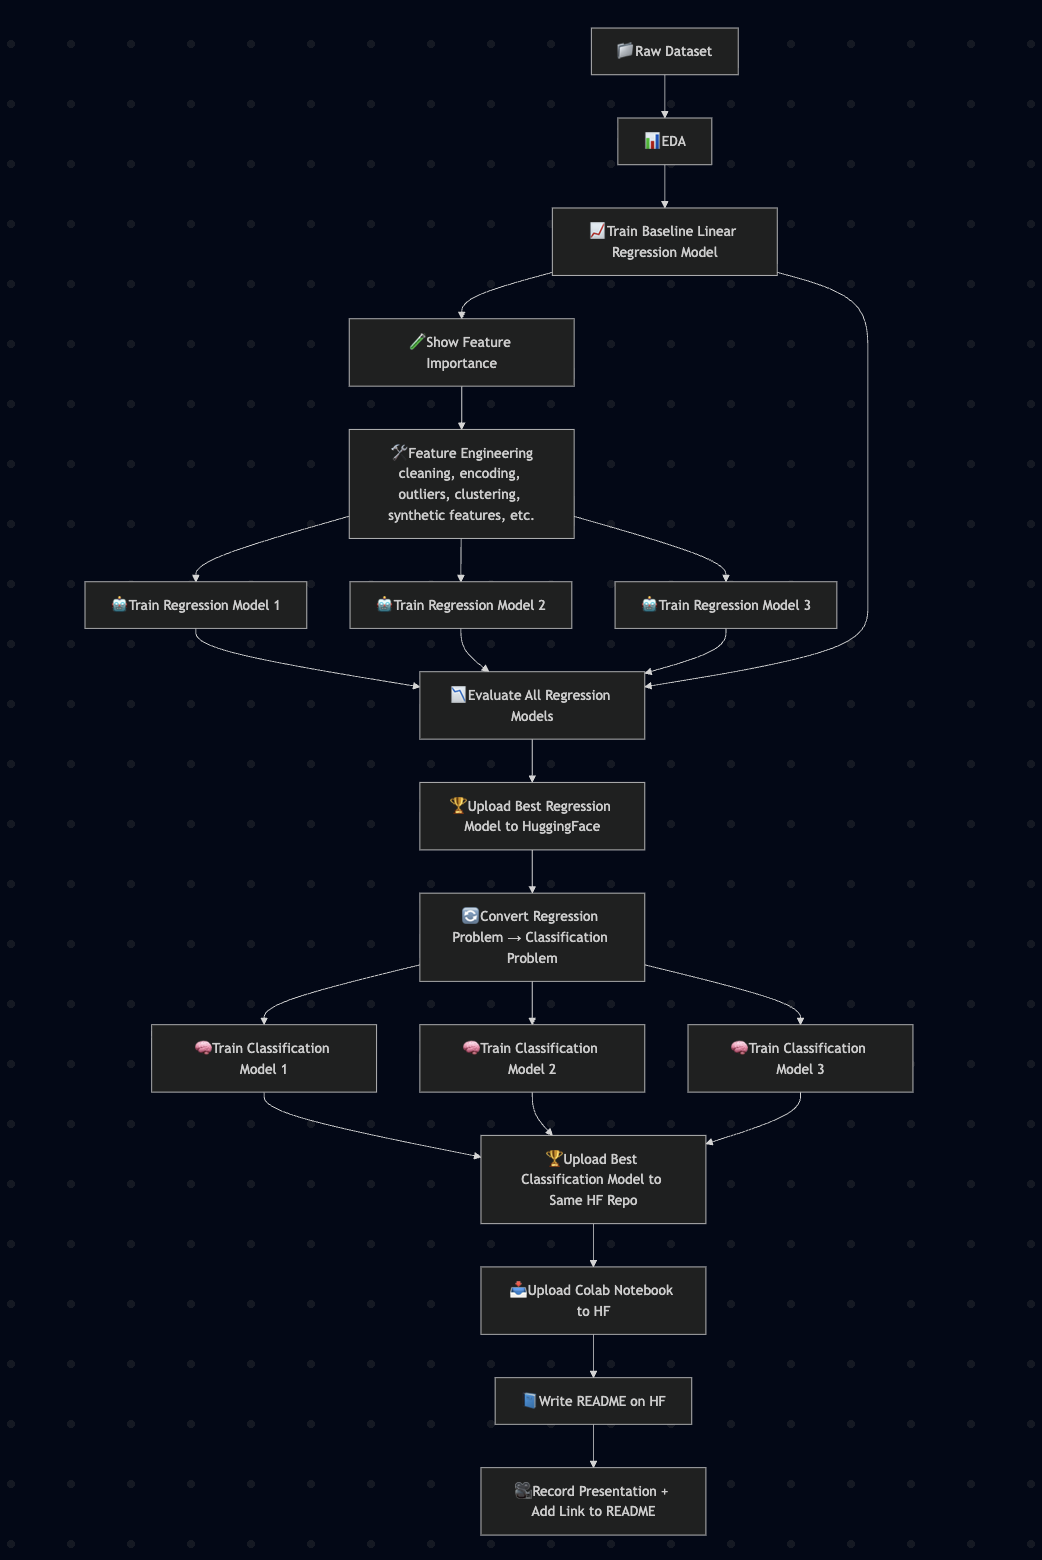

<br><br><br>

---

---

<br><br><br>

imports

In [ ]:
import os
import random

import numpy as np
import pandas as pd

import seaborn
import matplotlib.pyplot as plt

# <add more>

Set Seeds

In [ ]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# <add more>

For Jupyter Notebooks

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<br><br>

---

<br><br>

# **Part 1: Select a Regression Dataset**

1. Choose a numeric & categorical tabular dataset. If you prefer, you may use  open-source datasets; [Hugginface](https://huggingface.co/datasets?task_categories=task_categories:tabular-classification&sort=trending), [Kaggle](https://www.kaggle.com/datasets?tags=13302-Classification&minUsabilityRating=8.00+or+higher), etc.

2. Avoid choosing a "basic"/"small" dataset.
      - 10K rows and more.
      - 15 features and more.
      - Numeric & Categorial features are a must.

3. The Label (target variable) is numeric.

4. Please submit your dataset [here](https://forms.gle/YYiRLXJnbwUfwuwc7), to share it with the class so everyone can see.
And make sure your chosen dataset is unique using this [link](https://docs.google.com/spreadsheets/d/1M8uojrzhSyVnOlSAJpzCKxrhWdzPR77k4x8Kxvr8VDk/edit?usp=sharing).

      *Note: Due to their popularity, the following are datasets you may not choose.*
      > - Iris dataset
      > - Wine dataset
      > - Titanic dataset
      > - Boston Housing dataset

5. Choose a dataset with a combination of numeric and textual values. This way you would have enough information to work on.

6. Briefly describe your chosen dataset (source, size, features) and the question you want to answer.

In [ ]:

!pip install kagglehub

import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("robikscube/flight-delay-dataset-20182022")
print("Dataset downloaded to:", path)
print("Files in folder:", os.listdir(path))

file_path = os.path.join(path, "Combined_Flights_2018.csv")
print("Using file:", file_path)

df = pd.read_csv(file_path)
print("Original shape:", df.shape)

selected_features = [
    "FlightDate",
    "Airline",
    "Flight_Number_Operating_Airline",
    "Tail_Number",
    "Origin",
    "Dest",
    "CRSDepTime",
    "DepTime",
    "DepDelay",
    "TaxiOut",
    "TaxiIn",
    "CRSArrTime",
    "ArrTime",
    "ArrDelay",
    "Cancelled",
    "CRSElapsedTime",
    "ActualElapsedTime",
    "AirTime",
    "Distance",
    "DayOfWeek"
]

selected_features = [c for c in selected_features if c in df.columns]
df = df[selected_features]
print("After column selection:", df.shape)

df = df.dropna()
print("After dropna:", df.shape)

n_rows = min(20000, len(df))
sample_df = df.sample(n=n_rows, random_state=42)
print("Sample shape:", sample_df.shape)

out_path = "flight_delay_sample_20k_20features.csv"
sample_df.to_csv(out_path, index=False)
print("Saved sample to:", out_path)


Using Colab cache for faster access to the 'flight-delay-dataset-20182022' dataset.
Dataset downloaded to: /kaggle/input/flight-delay-dataset-20182022
Files in folder: ['Combined_Flights_2022.parquet', 'Combined_Flights_2021.parquet', 'Combined_Flights_2018.csv', 'Combined_Flights_2018.parquet', 'Airlines.csv', 'readme.md', 'Combined_Flights_2022.csv', 'Combined_Flights_2020.csv', 'Combined_Flights_2020.parquet', 'Combined_Flights_2019.csv', 'readme.html', 'Combined_Flights_2021.csv', 'Combined_Flights_2019.parquet', 'raw']
Using file: /kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2018.csv
Original shape: (5689512, 61)
After column selection: (5689512, 20)
After dropna: (5578618, 20)
Sample shape: (20000, 20)
Saved sample to: flight_delay_sample_20k_20features.csv


In [ ]:
#The dataset comes from Kaggle’s Flight Delay Dataset 2018–2022. After sampling 20,000 rows and selecting 20 mixed numeric and categorical features, the target variable is ArrDelay. The main question is whether we can predict a flight’s arrival delay based on scheduling, airline, and operational data.

In [ ]:
df.head()


FlightDate            Airline  Flight_Number_Operating_Airline Tail_Number  \
0  2018-01-23  Endeavor Air Inc.                             3298      N8928A   
1  2018-01-24  Endeavor Air Inc.                             3298      N800AY   
2  2018-01-25  Endeavor Air Inc.                             3298      N8836A   
3  2018-01-26  Endeavor Air Inc.                             3298      N800AY   
4  2018-01-27  Endeavor Air Inc.                             3298      N8839E   

  Origin Dest  CRSDepTime  DepTime  DepDelay  TaxiOut  TaxiIn  CRSArrTime  \
0    ABY  ATL        1202   1157.0      -5.0     14.0     7.0        1304   
1    ABY  ATL        1202   1157.0      -5.0     13.0    12.0        1304   
2    ABY  ATL        1202   1153.0      -9.0     18.0    11.0        1304   
3    ABY  ATL        1202   1150.0     -12.0     17.0    11.0        1304   
4    ABY  ATL        1400   1355.0      -5.0     17.0    11.0        1500   

   ArrTime  ArrDelay  Cancelled  CRSElapsedTime  ActualElapsedTime  AirTime  \
0   1256.0      -8.0      False            62.0               59.0     38.0   
1   1258.0      -6.0      False            62.0               61.0     36.0   
2   1302.0      -2.0      False            62.0               69.0     40.0   
3   1253.0     -11.0      False            62.0               63.0     35.0   
4   1459.0      -1.0      False            60.0               64.0     36.0   

   Distance  DayOfWeek  
0     145.0          2  
1     145.0          3  
2     145.0          4  
3     145.0          5  
4     145.0          6

<br><br><br>

---

<br><br><br>

# **Part 2: Exploratory Data Analysis (EDA)**

Use your EDA to tell the story of your data - highlight interesting patterns, anomalies, or relationships that lead you toward your classification goal. Ask interesting questions, and answer them.


1. **Data Cleaning** : Check for missing values, duplicate entries, scaling/normalize issues,  parsing dates, fixing typos, or any inconsistencies.  Document how you address them.
2. **Outlier Detection & Handling**: Identify outliers and decide whether to keep or remove them, providing a short justification.
2. **Descriptive Statistics**: Summarize the data (e.g., mean, median, correlations) to reveal patterns.
4. **Visualizations**: Use a set of  plots (e.g., histograms, scatter plots, box plots) to illustrate **key insights.** Label charts, axes, and legends clearly.

Tip: not necessarily in this order.

Missing values per feature:


FlightDate                         0
Airline                            0
Flight_Number_Operating_Airline    0
Tail_Number                        0
Origin                             0
Dest                               0
CRSDepTime                         0
DepTime                            0
DepDelay                           0
TaxiOut                            0
TaxiIn                             0
CRSArrTime                         0
ArrTime                            0
ArrDelay                           0
Cancelled                          0
CRSElapsedTime                     0
ActualElapsedTime                  0
AirTime                            0
Distance                           0
DayOfWeek                          0
dtype: int64

Duplicate rows: 0

Dataset shape after cleaning: (20000, 20)


FlightDate                 Airline  \
count                           20000                   20000   
unique                            NaN                      28   
top                               NaN  Southwest Airlines Co.   
freq                              NaN                    4760   
mean    2018-07-24 17:07:13.439999744                     NaN   
min               2018-01-01 00:00:00                     NaN   
25%               2018-04-22 00:00:00                     NaN   
50%               2018-08-15 00:00:00                     NaN   
75%               2018-10-24 00:00:00                     NaN   
max               2018-12-31 00:00:00                     NaN   
std                               NaN                     NaN   

        Flight_Number_Operating_Airline Tail_Number Origin   Dest  \
count                      20000.000000       20000  20000  20000   
unique                              NaN        5180    331    340   
top                                 NaN      N491HA    ORD    ORD   
freq                                NaN          19   1092   1023   
mean                        2651.622000         NaN    NaN    NaN   
min                            1.000000         NaN    NaN    NaN   
25%                          940.000000         NaN    NaN    NaN   
50%                         2122.000000         NaN    NaN    NaN   
75%                         4363.000000         NaN    NaN    NaN   
max                         9372.000000         NaN    NaN    NaN   
std                         1933.008657         NaN    NaN    NaN   

          CRSDepTime       DepTime      DepDelay      TaxiOut        TaxiIn  \
count   20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
unique           NaN           NaN           NaN          NaN           NaN   
top              NaN           NaN           NaN          NaN           NaN   
freq             NaN           NaN           NaN          NaN           NaN   
mean     1328.707500   1331.800800     10.355300     17.04210      7.390750   
min         1.000000      1.000000   -330.000000      2.00000      1.000000   
25%       913.000000    914.000000     -6.000000     11.00000      4.000000   
50%      1320.000000   1325.000000     -2.000000     15.00000      6.000000   
75%      1737.000000   1745.250000      7.000000     20.00000      9.000000   
max      2359.000000   2359.000000   1333.000000    177.00000    111.000000   
std       491.590319    506.841806     44.033613      9.63755      5.942426   

          CRSArrTime       ArrTime      ArrDelay Cancelled  CRSElapsedTime  \
count   20000.000000  20000.000000  20000.000000     20000    20000.000000   
unique           NaN           NaN           NaN         1             NaN   
top              NaN           NaN           NaN     False             NaN   
freq             NaN           NaN           NaN     20000             NaN   
mean     1478.801200   1457.038350      5.779150       NaN      139.686050   
min         1.000000      1.000000   -125.000000       NaN      -30.000000   
25%      1056.000000   1043.000000    -14.000000       NaN       87.000000   
50%      1510.000000   1501.000000     -5.000000       NaN      121.000000   
75%      1915.000000   1912.000000      8.000000       NaN      170.000000   
max      2400.000000   2400.000000   1310.000000       NaN      690.000000   
std       521.256787    541.940494     46.294458       NaN       72.933323   

        ActualElapsedTime       AirTime      Distance     DayOfWeek  
count        20000.000000  20000.000000  20000.000000  20000.000000  
unique                NaN           NaN           NaN           NaN  
top                   NaN           NaN           NaN           NaN  
freq                  NaN           NaN           NaN           NaN  
mean           135.110550    110.677700    794.141600      3.945000  
min             28.000000      9.000000     31.000000      1.000000  
25%             82.000000     59.000000  


Outliers detected per numeric feature:


Flight_Number_Operating_Airline      2
CRSDepTime                           0
DepTime                              0
DepDelay                           401
TaxiOut                            369
TaxiIn                             394
CRSArrTime                           0
ArrTime                              0
ArrDelay                           376
CRSElapsedTime                     319
ActualElapsedTime                  301
AirTime                            291
Distance                           200
DayOfWeek                            0
dtype: int64

Shape after removing outliers: (18458, 20)

Descriptive statistics (numeric):


FlightDate  Flight_Number_Operating_Airline  \
count                          18458                     18458.000000   
mean   2018-07-24 16:40:46.548921600                      2678.872305   
min              2018-01-01 00:00:00                         1.000000   
25%              2018-04-22 00:00:00                       974.000000   
50%              2018-08-16 00:00:00                      2150.000000   
75%              2018-10-24 00:00:00                      4397.750000   
max              2018-12-31 00:00:00                      7439.000000   
std                              NaN                      1931.547923   

         CRSDepTime      DepTime      DepDelay       TaxiOut        TaxiIn  \
count  18458.000000  18458.00000  18458.000000  18458.000000  18458.000000   
mean    1325.609709   1326.74553      5.574006     16.133113      6.773540   
min        1.000000      1.00000    -26.000000      2.000000      1.000000   
25%      910.000000    913.00000     -6.000000     11.000000      4.000000   
50%     1315.000000   1319.00000     -2.000000     14.000000      6.000000   
75%     1735.000000   1739.75000      5.000000     19.000000      8.000000   
max     2359.000000   2359.00000    142.000000     45.000000     25.000000   
std      491.485306    502.54488     23.169866      7.304068      4.048223   

         CRSArrTime       ArrTime      ArrDelay  CRSElapsedTime  \
count  18458.000000  18458.000000  18458.000000    18458.000000   
mean    1474.777332   1457.159551     -0.138097      133.925452   
min        1.000000      1.000000    -64.000000       24.000000   
25%     1055.000000   1044.000000    -15.000000       85.000000   
50%     1505.000000   1479.500000     -6.000000      120.000000   
75%     1910.000000   1907.000000      5.000000      165.000000   
max     2400.000000   2400.000000    144.000000      358.000000   
std      519.661899    532.462079     25.540890       63.680358   

       ActualElapsedTime       AirTime      Distance     DayOfWeek  
count       18458.000000  18458.000000  18458.000000  18458.000000  
mean          128.213349    105.306696    751.392621      3.949128  
min            28.000000      9.000000     31.000000      1.000000  
25%            80.000000     58.000000    349.000000      2.000000  
50%           114.000000     91.000000    622.000000      4.000000  
75%           160.000000    136.000000   1005.000000      6.000000  
max           353.000000    323.000000   2586.000000      7.000000  
std            63.126416     61.965138    527.690414      2.006886


Correlations (numeric features only):


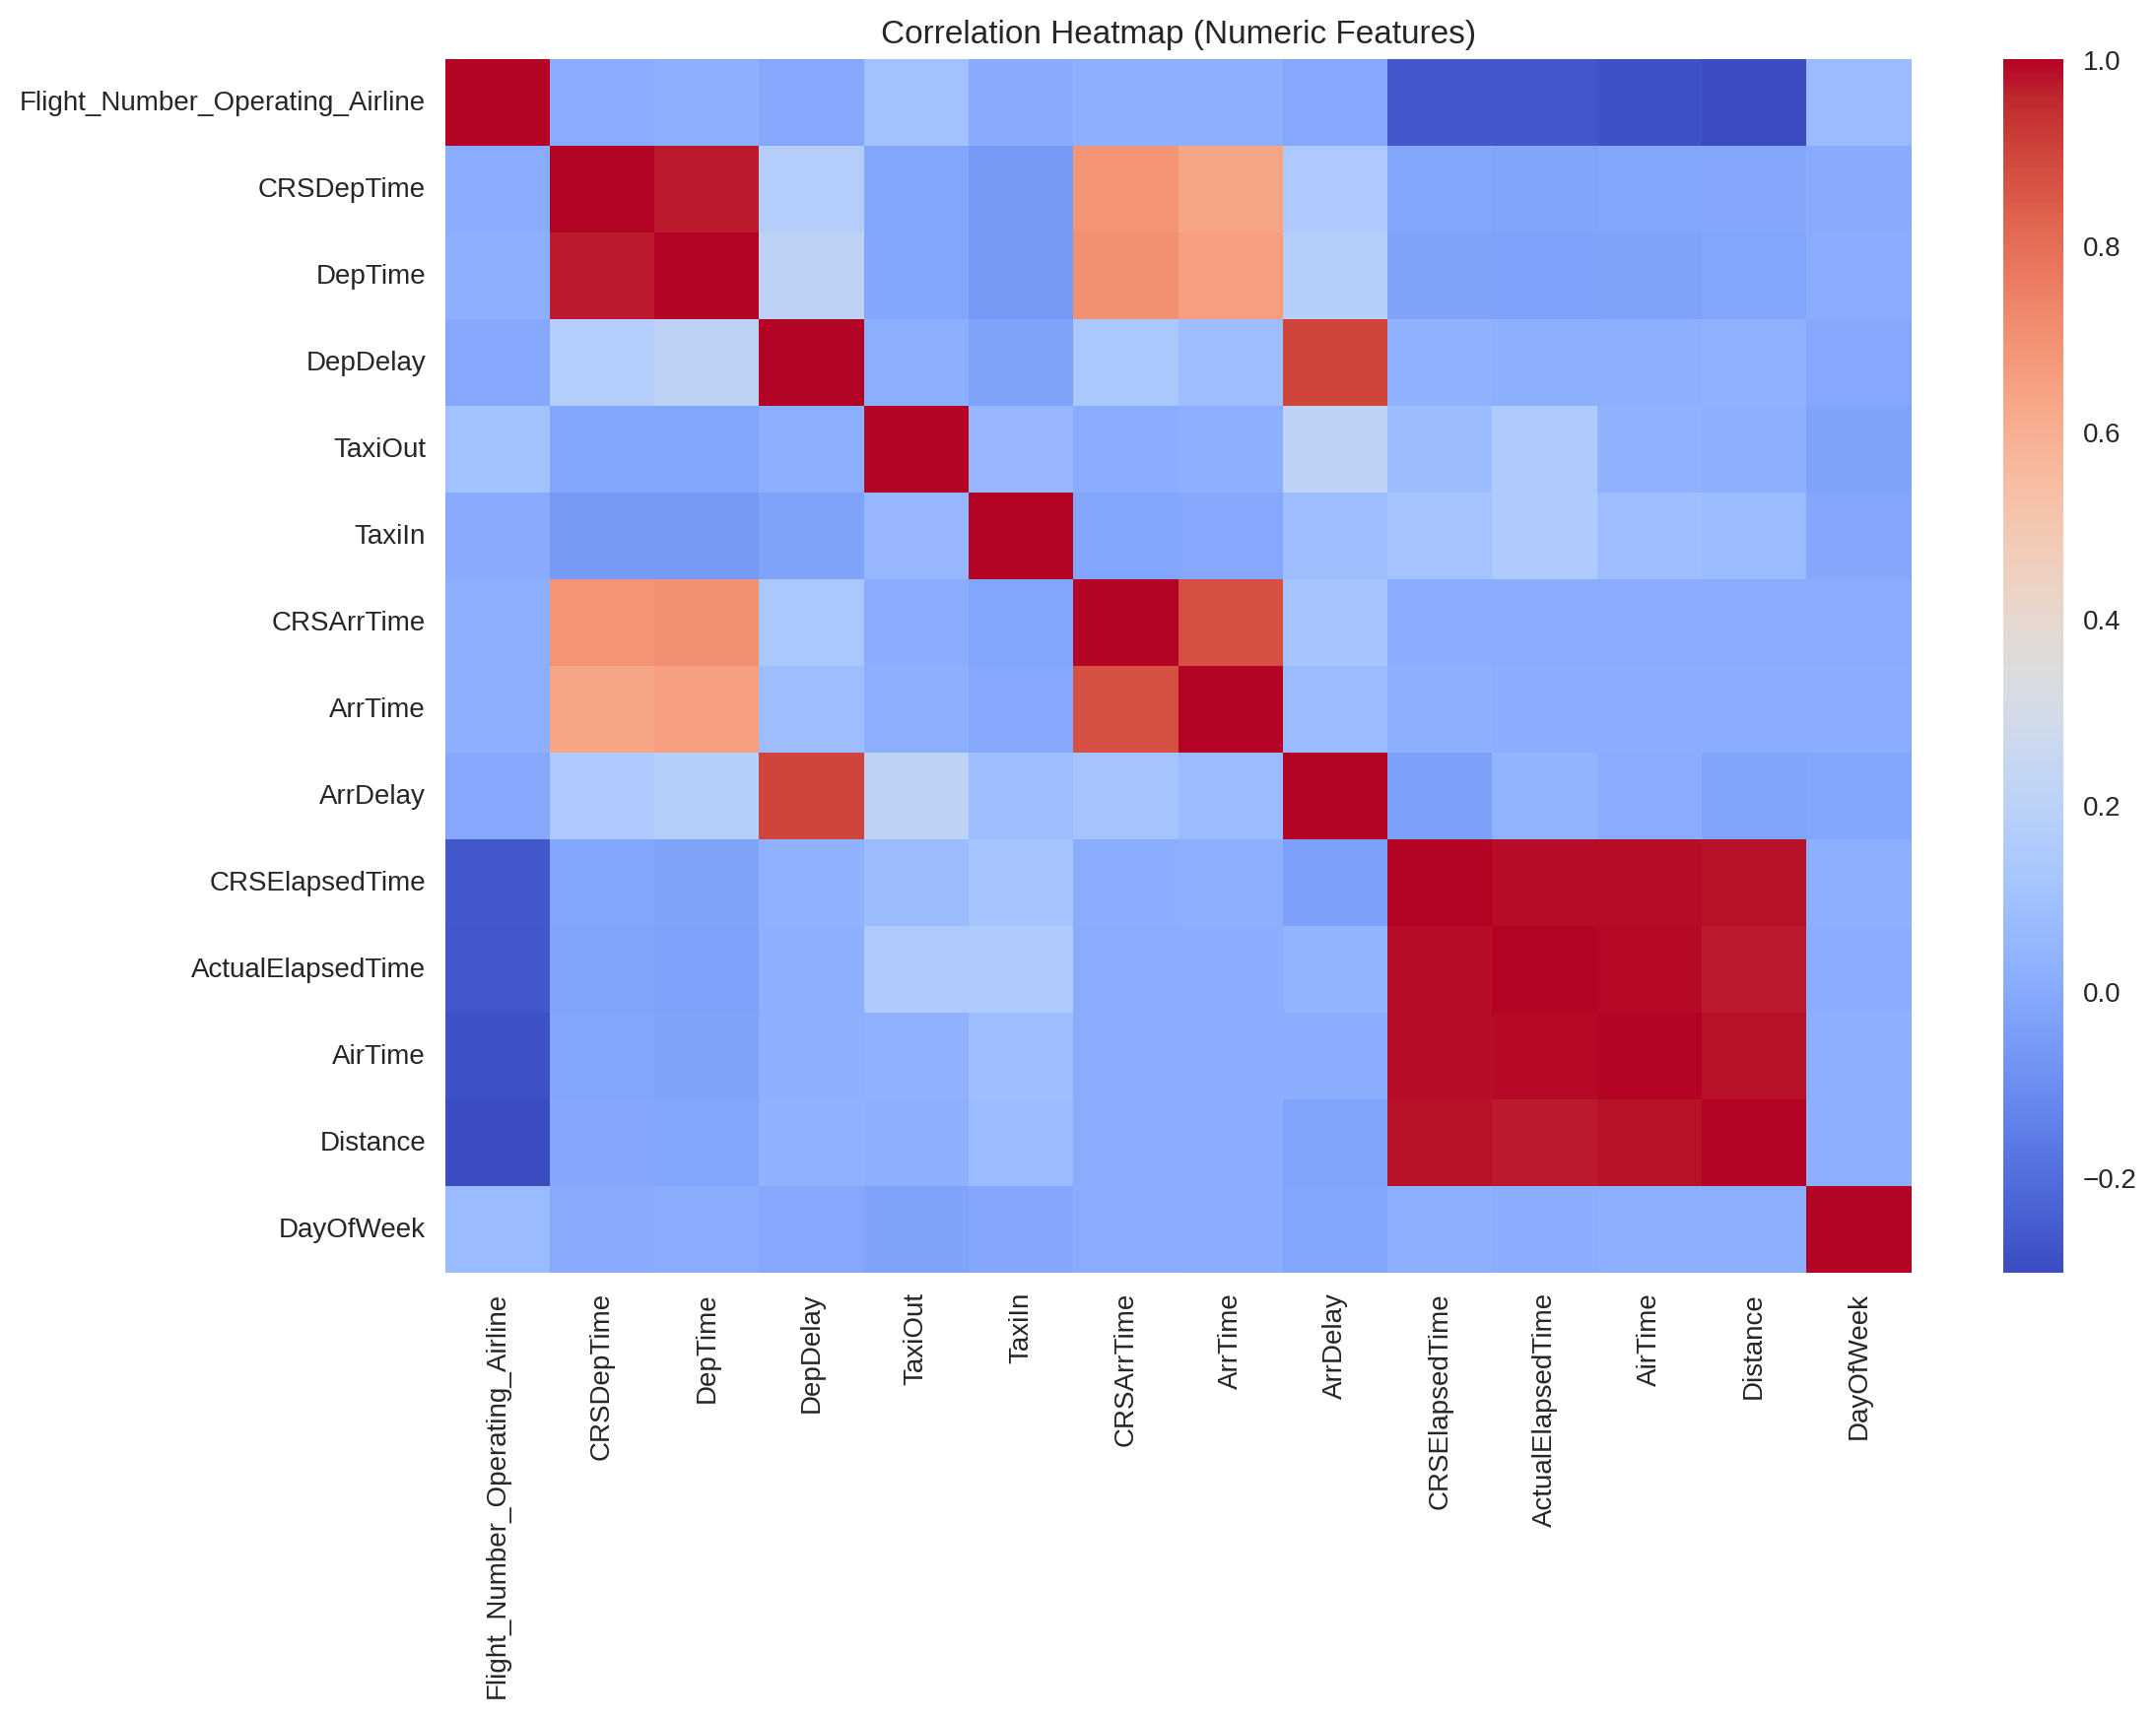

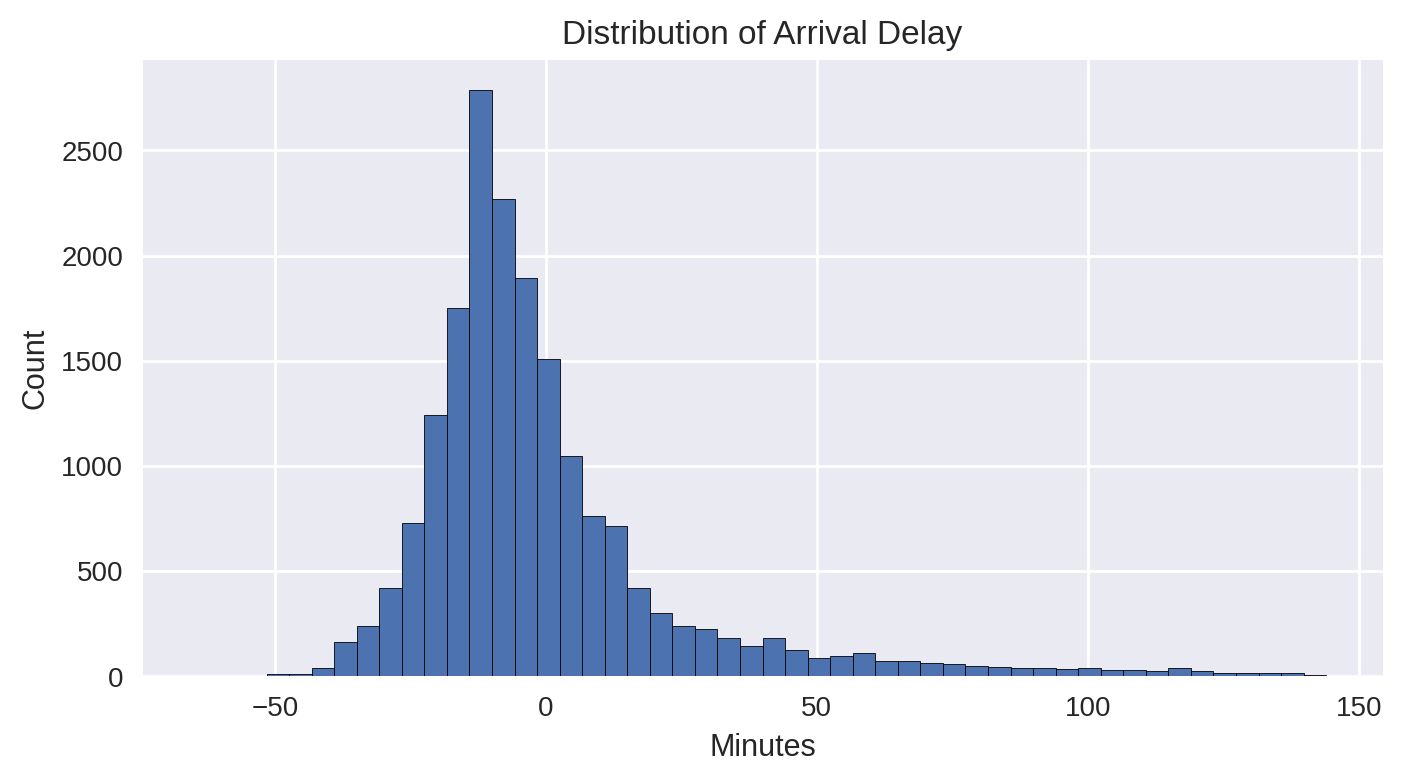

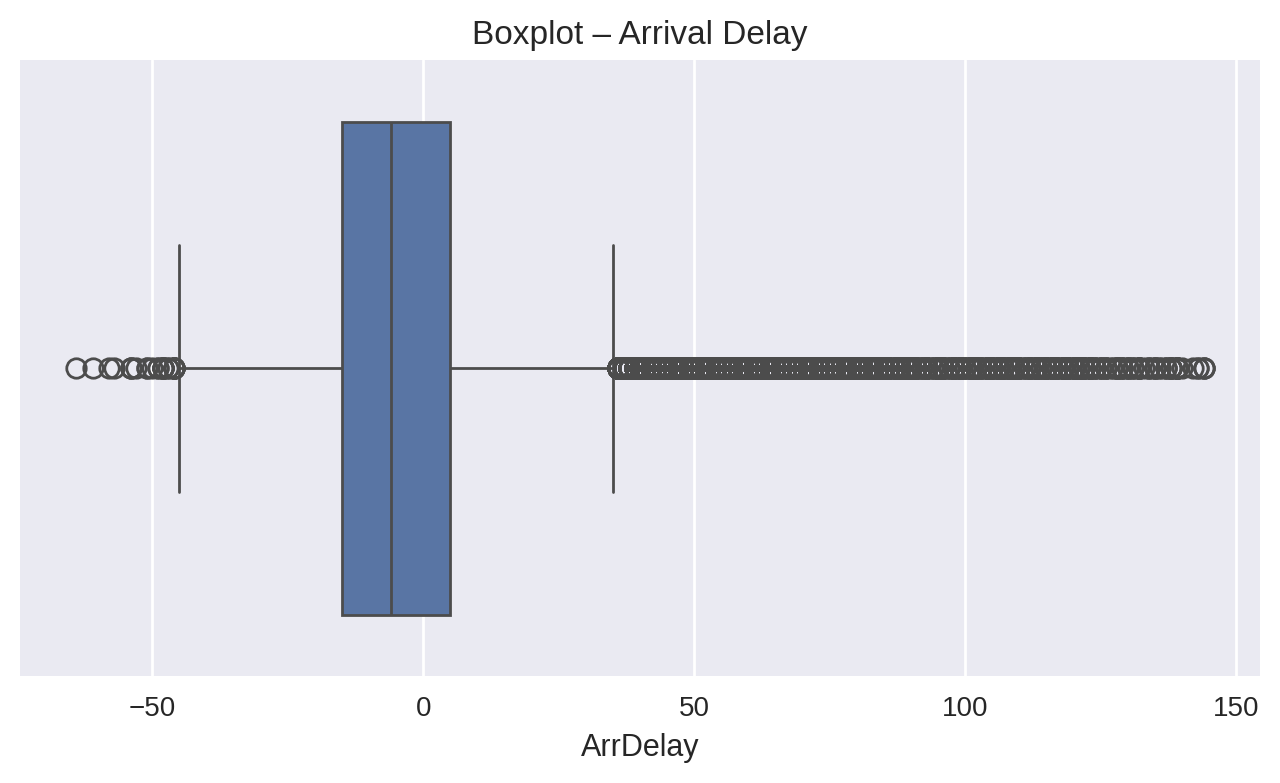

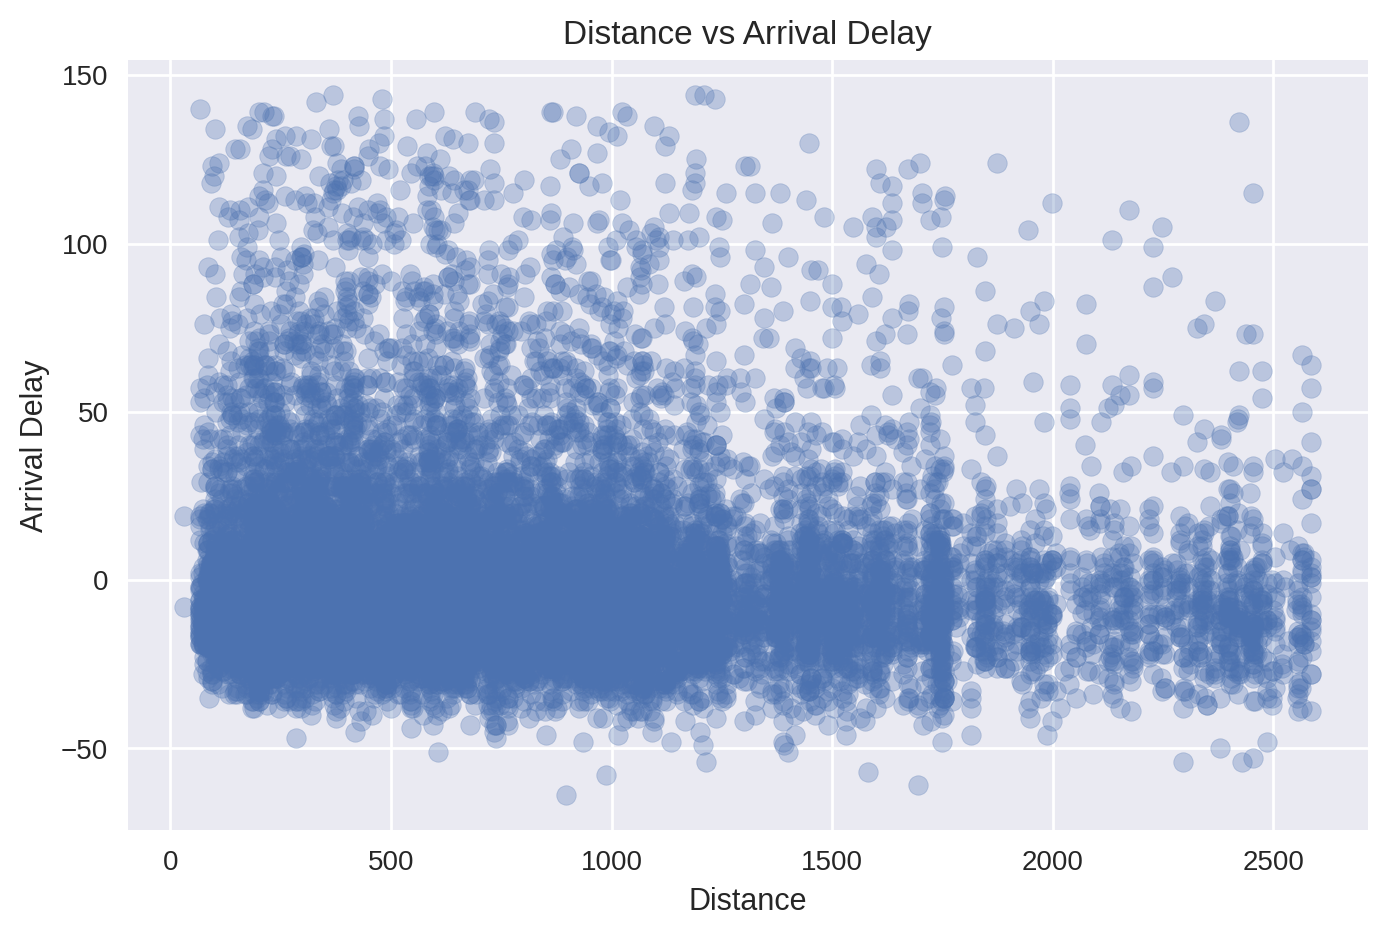

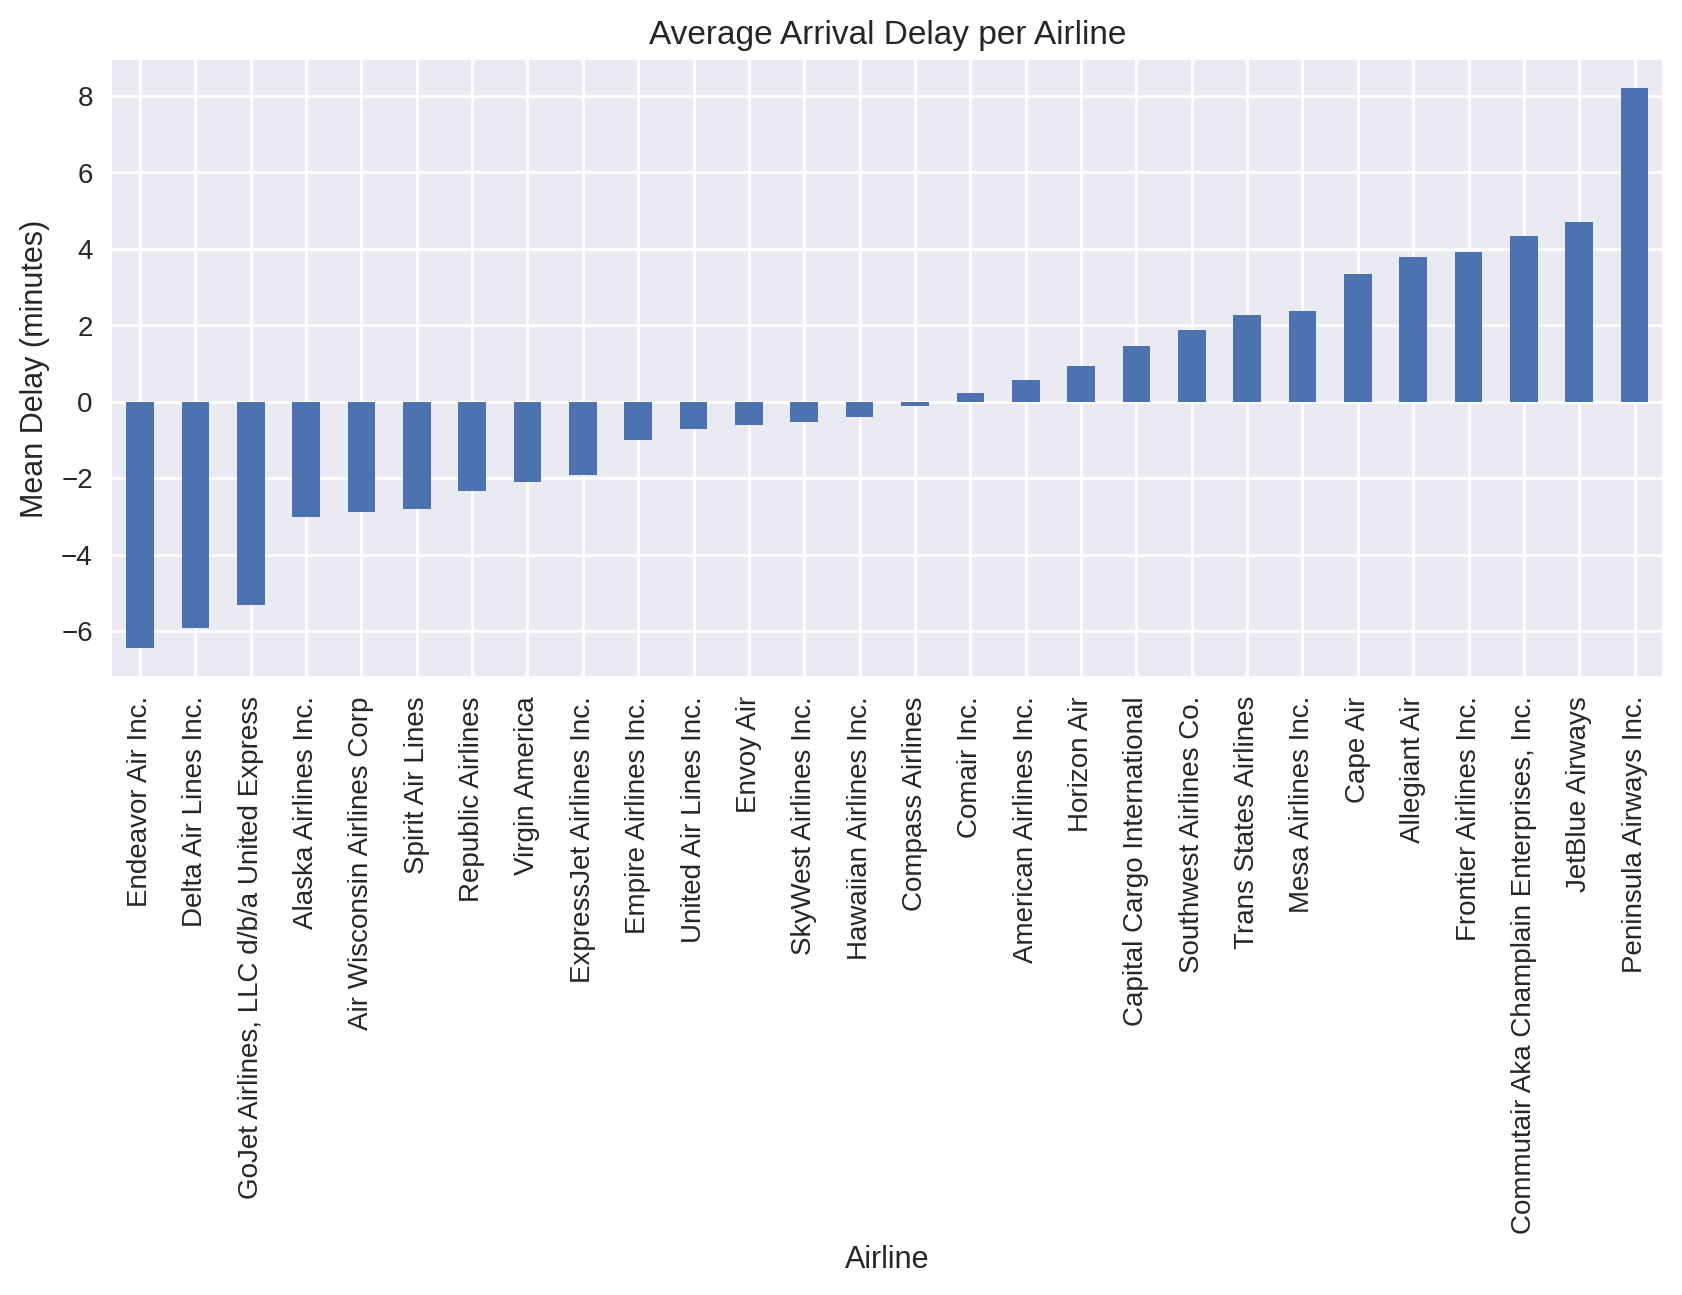

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

df = pd.read_csv("flight_delay_sample_20k_20features.csv")

# 1. DATA CLEANING

print("Missing values per feature:")
display(df.isnull().sum())

print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

if "FlightDate" in df.columns:
    df["FlightDate"] = pd.to_datetime(df["FlightDate"], errors="coerce")

print("\nDataset shape after cleaning:", df.shape)
display(df.describe(include="all"))

# 2. OUTLIER DETECTION & HANDLING

numeric_cols = df.select_dtypes(include=[np.number]).columns

from scipy.stats import zscore
z_scores = np.abs(df[numeric_cols].apply(zscore))

outliers = (z_scores > 3).sum()
print("\nOutliers detected per numeric feature:")
display(outliers)

df_no_outliers = df[(z_scores < 3).all(axis=1)]
print("Shape after removing outliers:", df_no_outliers.shape)

# 3. DESCRIPTIVE STATISTICS

print("\nDescriptive statistics (numeric):")
display(df_no_outliers.describe())

print("\nCorrelations (numeric features only):")
import numpy as np

numeric_cols = df_no_outliers.select_dtypes(include=[np.number]).columns
corr_matrix = df_no_outliers[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# 4. VISUALIZATIONS

plt.figure(figsize=(8,4))
plt.hist(df_no_outliers["ArrDelay"], bins=50, edgecolor="black")
plt.title("Distribution of Arrival Delay")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df_no_outliers["ArrDelay"])
plt.title("Boxplot – Arrival Delay")
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(df_no_outliers["Distance"], df_no_outliers["ArrDelay"], alpha=0.3)
plt.title("Distance vs Arrival Delay")
plt.xlabel("Distance")
plt.ylabel("Arrival Delay")
plt.show()

plt.figure(figsize=(10,4))
df_no_outliers.groupby("Airline")["ArrDelay"].mean().sort_values().plot(kind="bar")
plt.title("Average Arrival Delay per Airline")
plt.ylabel("Mean Delay (minutes)")
plt.show()


### **Research:** Pose relevant questions about your dataset, then answer them using visual elements (e.g. charts or plots) to provide clear insights.

For example, in the 2nd lecture the entire class took a survey. Then, we talked about the collected data and desplayed the collected data using the right **plots** - Lines, Bars, Hist, Pie, Map, HeatMap, Area, Time, etc.

An aditional more specific example, would be the questions we asked during the recitation on the `Titanic` dataset:
  - "Did survival rates differ by gender?"
  - "Was passenger class related to survival?"
  - "What was the age distribution of survivors vs. non-survivors?"
  - "Did embarking location (port) have any effect on survival?"    
  
And how we answered those questions using **plots**.

The idea is to pose questions that can uncover patterns, correlations, or anomalies in your dataset, then back those up with clean, insightful visualizations.

In [ ]:
#1. Do arrival delays vary significantly between airlines?

#2. Is there a relationship between flight distance and arrival delay?

#3. Are departure delays strongly correlated with arrival delays?

#4. How does the day of the week affect average arrival delay?


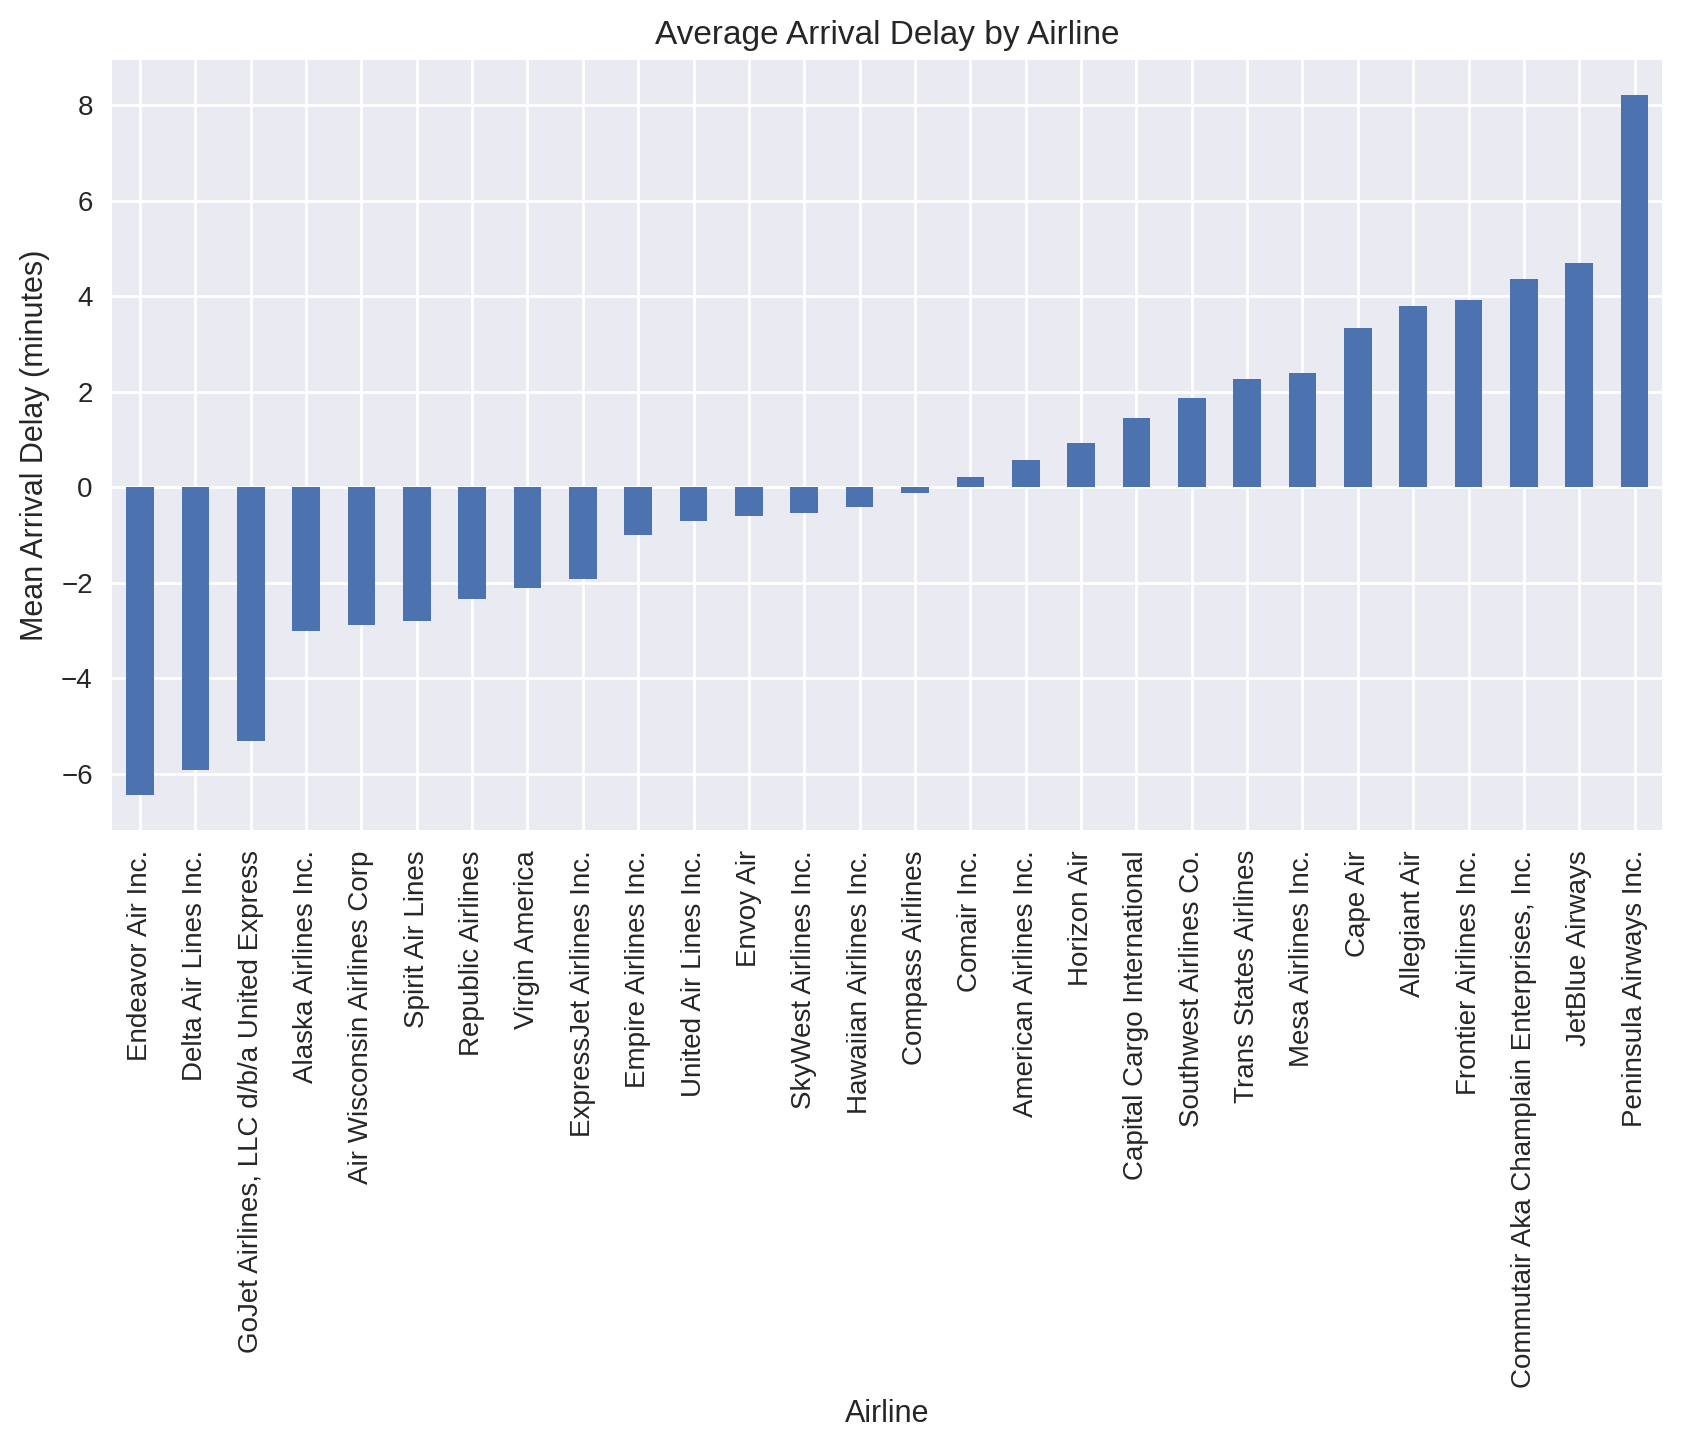

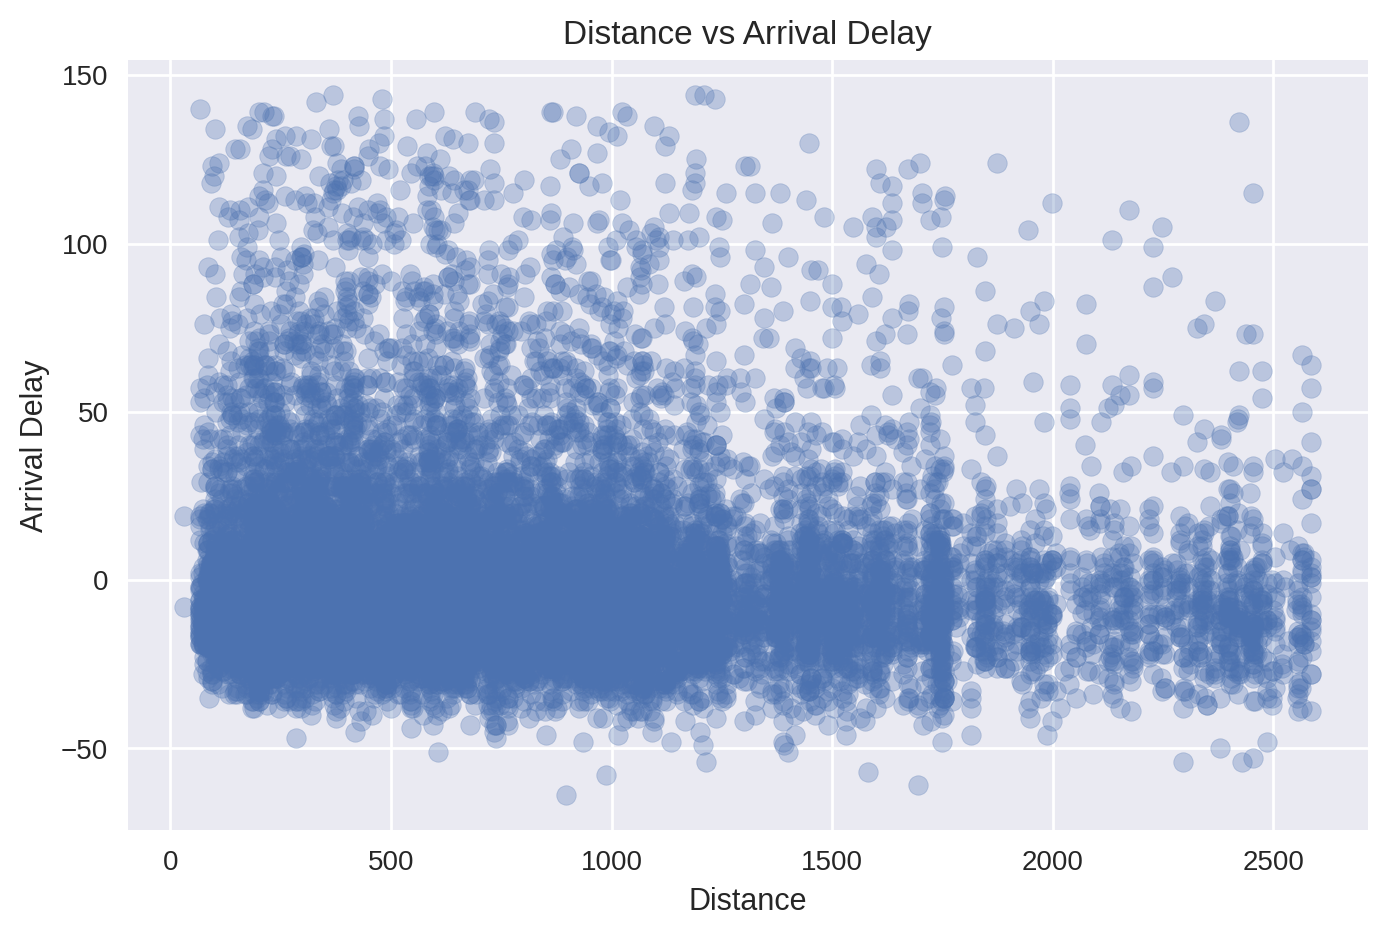

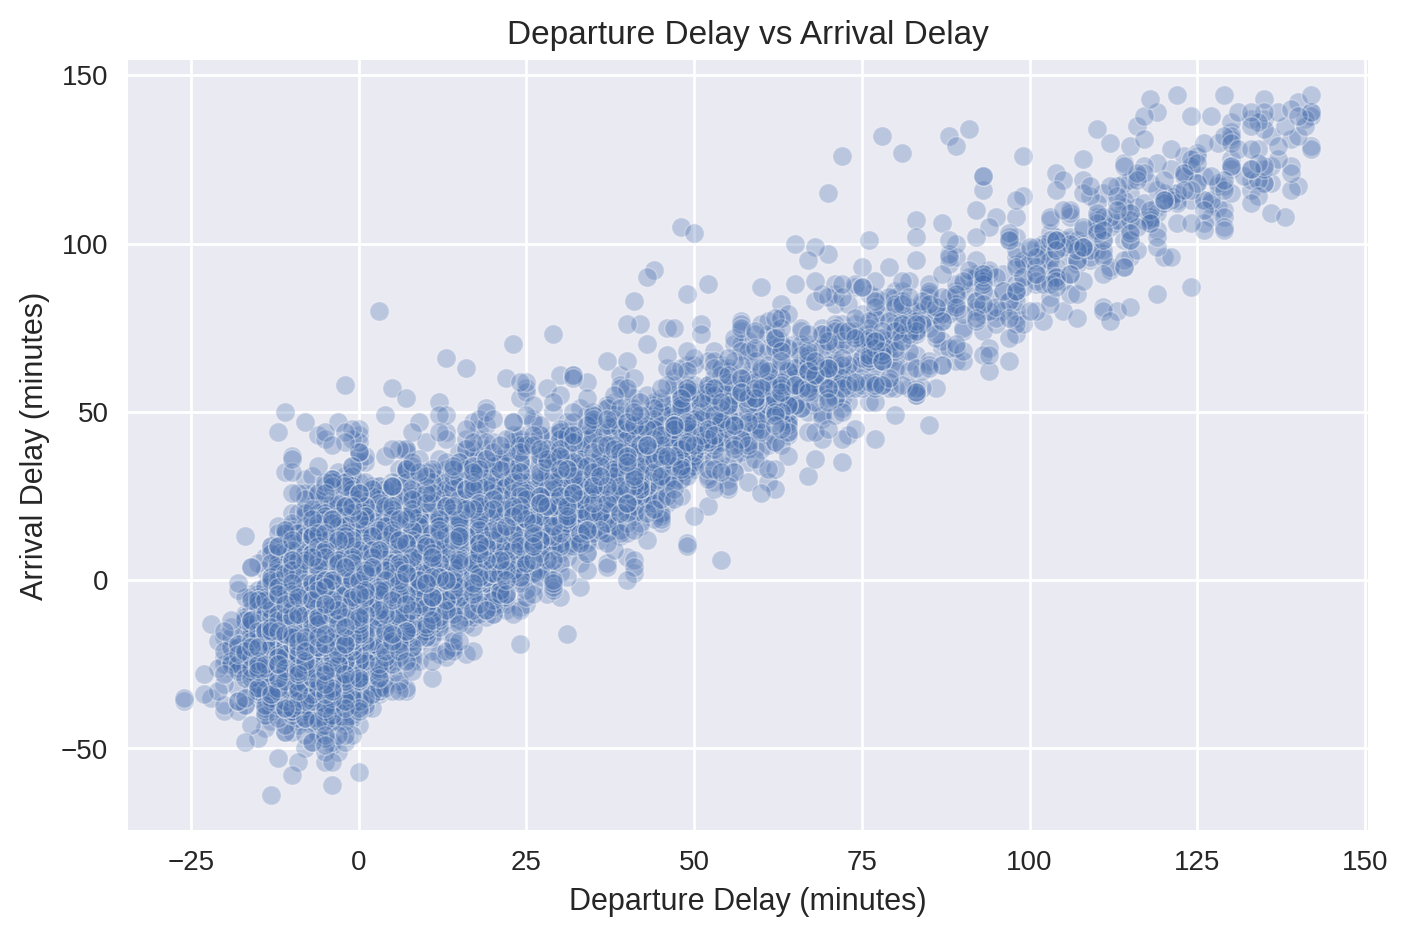

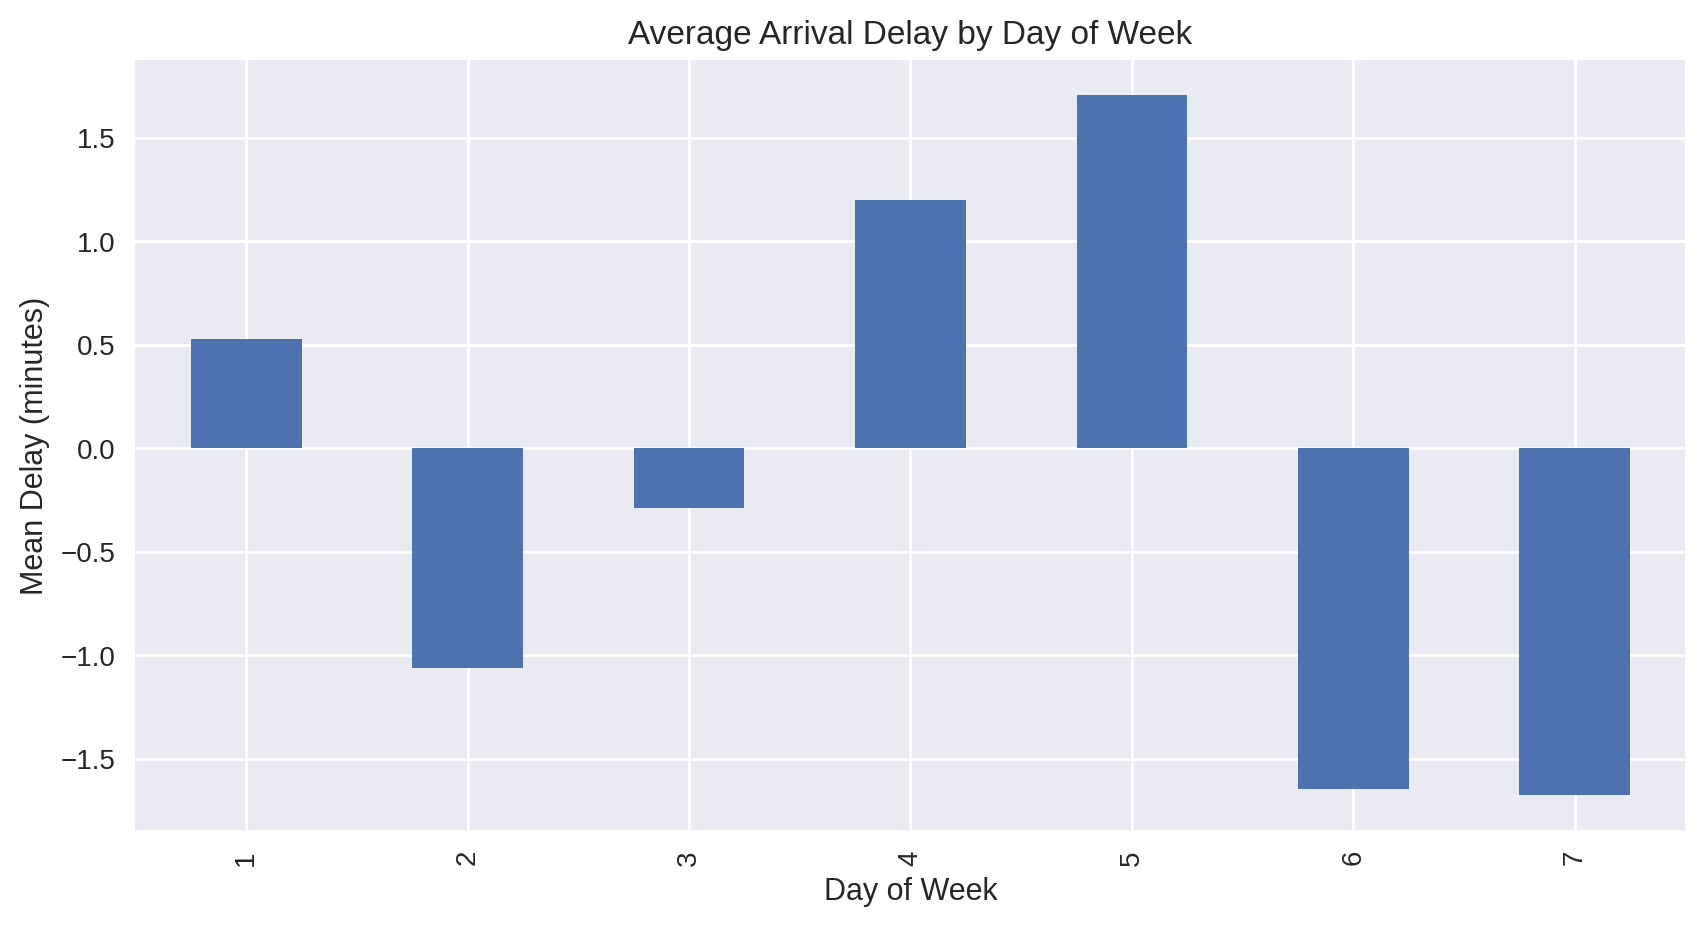

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Average delay per airline
plt.figure(figsize=(10,5))
df_no_outliers.groupby("Airline")["ArrDelay"].mean().sort_values().plot(kind="bar")
plt.title("Average Arrival Delay by Airline")
plt.ylabel("Mean Arrival Delay (minutes)")
plt.xlabel("Airline")
plt.show()

# 2. Distance vs Arrival Delay
plt.figure(figsize=(8,5))
plt.scatter(df_no_outliers["Distance"], df_no_outliers["ArrDelay"], alpha=0.3)
plt.title("Distance vs Arrival Delay")
plt.xlabel("Distance")
plt.ylabel("Arrival Delay")
plt.show()

# 3. DepDelay vs ArrDelay correlation
plt.figure(figsize=(8,5))
sns.scatterplot(x="DepDelay", y="ArrDelay", data=df_no_outliers, alpha=0.3)
plt.title("Departure Delay vs Arrival Delay")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

# 4. Day-of-week effect
plt.figure(figsize=(10,5))
df_no_outliers.groupby("DayOfWeek")["ArrDelay"].mean().plot(kind="bar")
plt.title("Average Arrival Delay by Day of Week")
plt.ylabel("Mean Delay (minutes)")
plt.xlabel("Day of Week")
plt.show()


<br><br><br>

---

<br><br><br>

# **Part 3: Define and Train a baseline model**

1. **Regression Goal**: Clearly state the problem you’re addressing.

2. **Feature Selection**: Identify the features that seem most relevant. It’s fine to start with all features if you’re unsure.

3. **Train-Test Split**: Partition your data into training, and testing sets. Use simple sampling. Quick reminder - when using ramdom - Use `Seed`!

4. **Model Training**: For simplicity, start with default parameters on a `Linear Regression` model, using scikit-learn. Focus on establishing a baseline.

5. **Model Evaluation**: Present straightforward metrics such as MAE, MSE, RMSE, R2, etc.

6. **Insights**: Summarize the model’s performance with visuals.

7. **Feature Importance:** Explain & Visualize  `feature importance` by looking on the `coefficients` of the Linear Regression model .

<br>

*FYI: Sections 5 and 6 will be repeated throughout your work.*

Regression Goal:
Predict flight arrival delay (ArrDelay) using flight schedule, airline, and operational features.

Selected numeric features: ['Flight_Number_Operating_Airline', 'CRSDepTime', 'DepTime', 'DepDelay', 'TaxiOut', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance', 'DayOfWeek']
Selected categorical features: ['FlightDate', 'Airline', 'Tail_Number', 'Origin', 'Dest', 'Cancelled'] 

Train size: 16000  |  Test size: 4000

Baseline Linear Regression model trained.

Baseline Model Evaluation:
MAE  : 0.01
MSE  : 0.00
RMSE : 0.05
R²   : 1.000



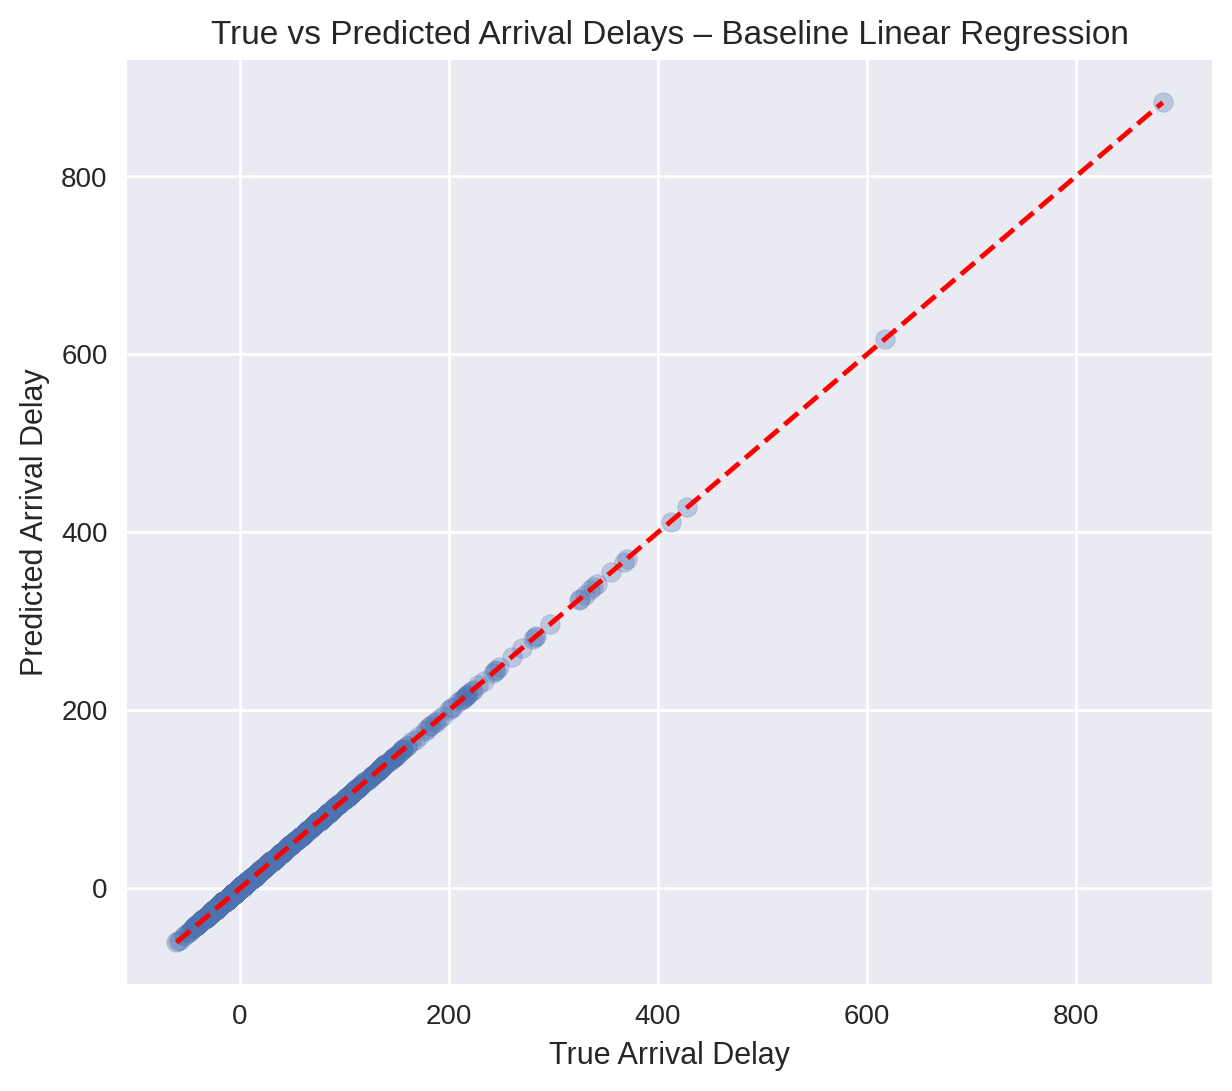

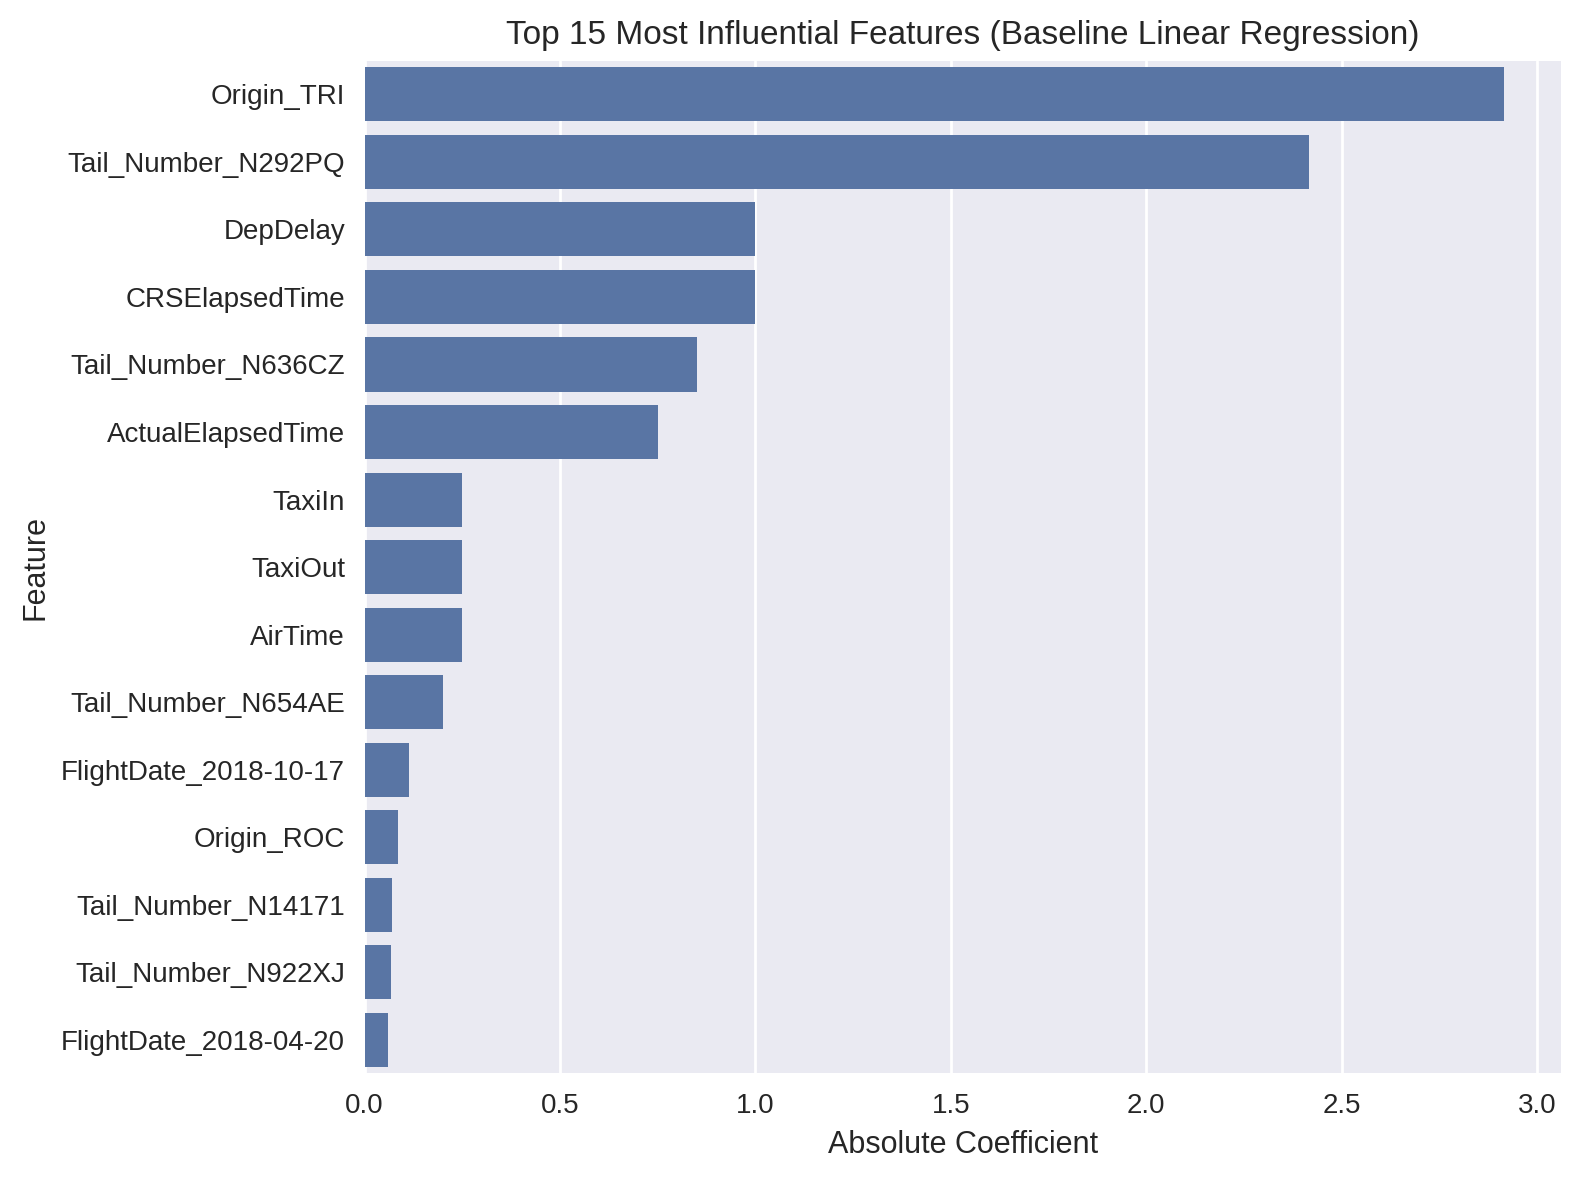

feature  coefficient  abs_coef
5671             Origin_TRI    -2.914369  2.914369
1398     Tail_Number_N292PQ    -2.415291  2.415291
3                  DepDelay     0.999984  0.999984
8            CRSElapsedTime    -0.998970  0.998970
2952     Tail_Number_N636CZ    -0.850532  0.850532
9         ActualElapsedTime     0.749899  0.749899
5                    TaxiIn     0.250022  0.250022
4                   TaxiOut     0.250020  0.250020
10                  AirTime     0.249858  0.249858
3045     Tail_Number_N654AE     0.200546  0.200546
302   FlightDate_2018-10-17    -0.112942  0.112942
5627             Origin_ROC     0.084279  0.084279
722      Tail_Number_N14171     0.069219  0.069219
4802     Tail_Number_N922XJ     0.066620  0.066620
122   FlightDate_2018-04-20     0.058903  0.058903

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset

df = pd.read_csv("flight_delay_sample_20k_20features.csv")

# 1. Regression Goal

print("Regression Goal:")
print("Predict flight arrival delay (ArrDelay) using flight schedule, airline, and operational features.\n")

# 2. Feature Selection

TARGET = "ArrDelay"
FEATURES = [col for col in df.columns if col != TARGET]

X = df[FEATURES]
y = df[TARGET]

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Selected numeric features:", numeric_features)
print("Selected categorical features:", categorical_features, "\n")

# 3. Train–Test Split (with Seed)

SEED = 42
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=SEED
)

print(f"Train size: {X_train.shape[0]}  |  Test size: {X_test.shape[0]}\n")

# 4. Model Training – Baseline Linear Regression

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

baseline_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", LinearRegression())
])

baseline_model.fit(X_train, y_train)
print("Baseline Linear Regression model trained.\n")

# 5. Model Evaluation – MAE, MSE, RMSE, R²

y_pred = baseline_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Baseline Model Evaluation:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}\n")

# 6. Insights – Visualizing Performance

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], "r--")  # ideal line
plt.xlabel("True Arrival Delay")
plt.ylabel("Predicted Arrival Delay")
plt.title("True vs Predicted Arrival Delays – Baseline Linear Regression")
plt.show()

# 7. Feature Importance – Coefficients

linreg = baseline_model.named_steps["regressor"]
ohe = baseline_model.named_steps["preprocess"].named_transformers_["cat"]

ohe_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(ohe_feature_names)

coef_df = pd.DataFrame({
    "feature": all_feature_names,
    "coefficient": linreg.coef_,
})
coef_df["abs_coef"] = coef_df["coefficient"].abs()
coef_df = coef_df.sort_values(by="abs_coef", ascending=False)

top_n = 15
top_coef = coef_df.head(top_n)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_coef,
    x="abs_coef",
    y="feature",
)
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Most Influential Features (Baseline Linear Regression)")
plt.tight_layout()
plt.show()

top_coef


In [ ]:
#Feature Importance – Short Explanation
#The model shows that the most influential predictors of arrival delay are departure-related features such as DepDelay, CRSElapsedTime, and ActualElapsedTime, which directly reflect how late a flight is running even before landing. Some tail-number and origin dummy variables also have strong coefficients, indicating systematic delay patterns tied to specific aircraft or airports. Features with small coefficients contribute minimally and have limited predictive value in the baseline model.

<br><br><br>

---

<br><br><br>

# **Part 4: Feature Engineering**

* Create, transform, scale, or extract new features; encoding categoricals, polynomial features, PCA, etc.
*TIP: use sklearn's tools, such as Scalar, One-Hot, etc.*

* To achieve the best possible results on the assignment, make extensive use of feature engineering.

* Use a `Clustring Model` to create a new feature.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans

df_fe = pd.read_csv("flight_delay_sample_20k_20features.csv")

# 1. Create / transform new features

df_fe["DepDelay_squared"] = df_fe["DepDelay"] ** 2

df_fe["Delay_to_Distance"] = df_fe["DepDelay"] / (df_fe["Distance"] + 1)

df_fe["AirTime_per_Distance"] = df_fe["AirTime"] / (df_fe["Distance"] + 1)

# 2. Scaling numerical features for clustering

scale_features = ["Distance", "AirTime", "DepDelay", "TaxiOut"]

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_fe[scale_features])
scaled_df = pd.DataFrame(scaled_values, columns=[f"{c}_scaled" for c in scale_features])

df_fe = pd.concat([df_fe.reset_index(drop=True), scaled_df], axis=1)

# 3. Clustering Model – create new cluster feature

kmeans = KMeans(n_clusters=3, random_state=42)
df_fe["DelayCluster"] = kmeans.fit_predict(scaled_df)

print("Cluster centers:")
print(kmeans.cluster_centers_)

print("\nNew features created:")
print(["DepDelay_squared", "Delay_to_Distance", "AirTime_per_Distance", "DelayCluster"])

# 4. Save enhanced dataset

df_fe.to_csv("flight_delay_with_features.csv", index=False)
print("\nEnhanced dataset saved as flight_delay_with_features.csv")


Cluster centers:
[[ 1.76106278  1.75386349 -0.06616856  0.01453875]
 [-0.37830771 -0.37984007 -0.17873034 -0.25207563]
 [-0.28171645 -0.25957217  1.32612408  1.69508799]]

New features created:
['DepDelay_squared', 'Delay_to_Distance', 'AirTime_per_Distance', 'DelayCluster']

Enhanced dataset saved as flight_delay_with_features.csv


### New Features

We recommend reading the resources uploaded to the forum.

### **Applying Clustering (Unsupervised Learning):**

* Run at least one clustering algorithm; K-Means, DBSCAN, etc.
* Visualize the clusters using dimensionality reduction (PCA, t-SNE, UMAP).
* Interpret the clusters: What makes them distinct? Are they useful?
* Use the results to create new features (e.g., cluster ID, distance to centroid, cluster probabilities).


New cluster features added: ['ClusterID', 'ClusterDistance']


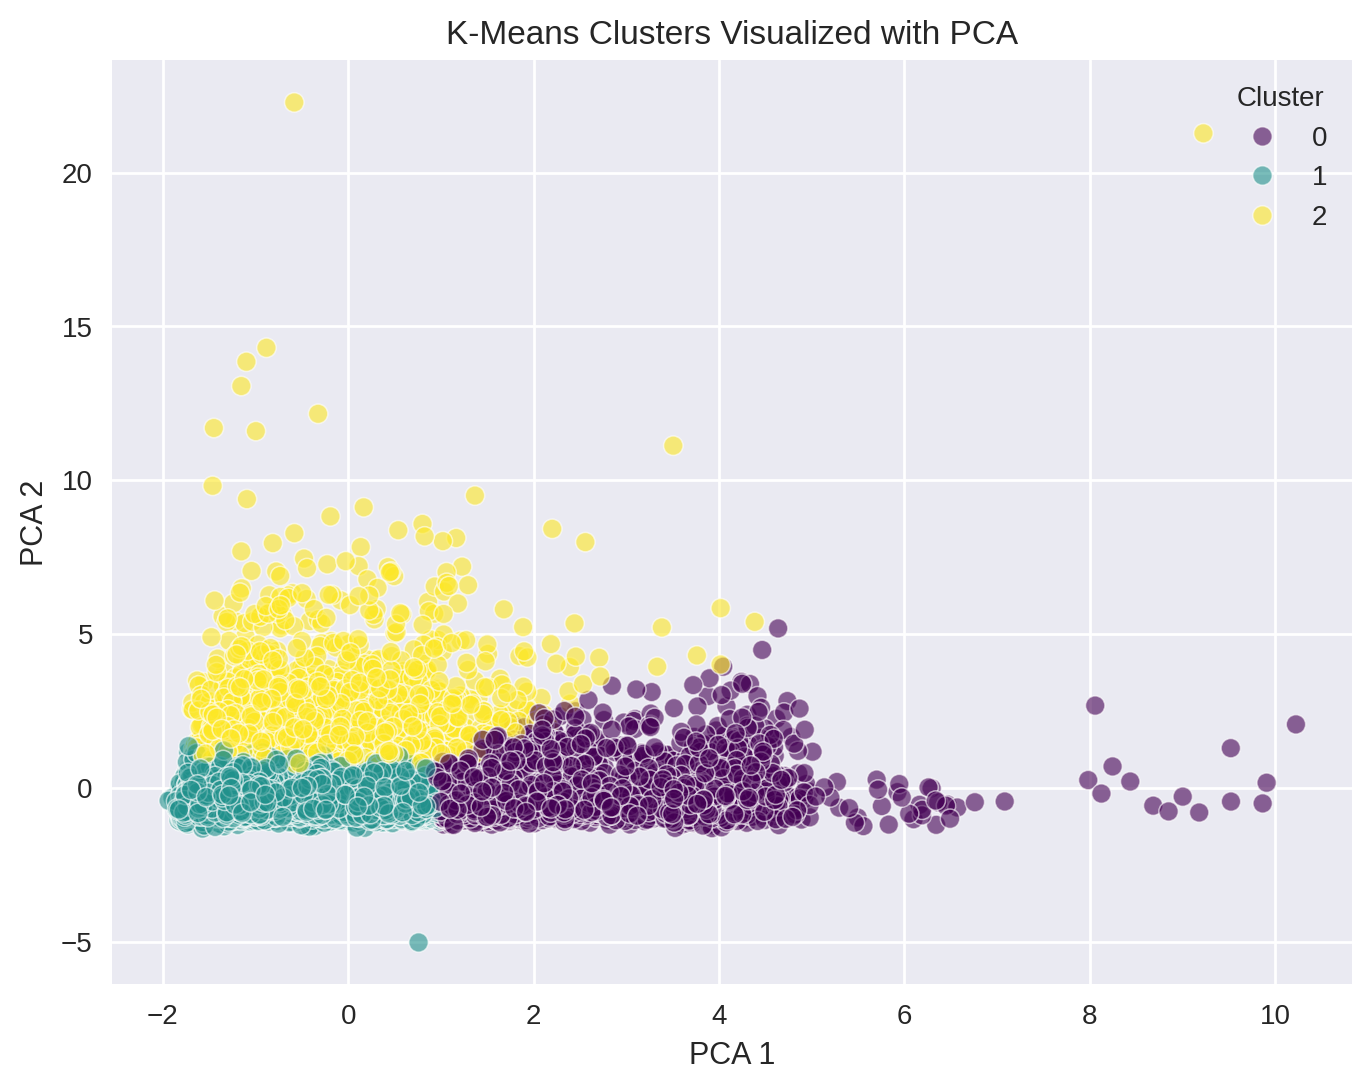

Distance     AirTime   DepDelay    TaxiOut
ClusterID                                               
0          1846.727907  234.895349   7.390698  17.183140
1           567.970110   83.767038   2.491663  14.624299
2           627.060275   92.467489  69.136213  33.396773

Saved as: flight_delay_with_features_and_clusters.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset with engineered features
df_cluster = pd.read_csv("flight_delay_with_features.csv")

# 2. Select features for clustering (operational delay-related features)
cluster_features = ["Distance", "AirTime", "DepDelay", "TaxiOut"]

X = df_cluster[cluster_features]

# 3. Standardize features before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Run K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 5. Create new cluster-based features
df_cluster["ClusterID"] = clusters
df_cluster["ClusterDistance"] = kmeans.transform(X_scaled).min(axis=1)

print("New cluster features added: ['ClusterID', 'ClusterDistance']")

# 6. Dimensionality reduction (PCA) for visualization
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X_scaled)

df_cluster["PCA1"] = pca_components[:, 0]
df_cluster["PCA2"] = pca_components[:, 1]

# 7. Visualize clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="ClusterID",
    data=df_cluster,
    palette="viridis",
    alpha=0.6
)
plt.title("K-Means Clusters Visualized with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

# 8. Cluster interpretation: mean values per cluster
cluster_summary = df_cluster.groupby("ClusterID")[cluster_features].mean()
display(cluster_summary)

# 9. Save dataset with clustering features for later modeling
df_cluster.to_csv("flight_delay_with_features_and_clusters.csv", index=False)
print("Saved as: flight_delay_with_features_and_clusters.csv")





### Clustering – Interpretation and New Features

We applied K-Means (k = 3) to standardized operational features  
(`Distance`, `AirTime`, `DepDelay`, `TaxiOut`).  
The PCA visualization shows clear separation between clusters, indicating  
different delay behavior patterns.

Cluster-level averages reveal that some clusters contain mostly short flights
with small delays, while others group longer flights with higher delays and
taxi times.  
We created two new features: **ClusterID** (categorical cluster label) and  
**ClusterDistance** (numeric distance to the assigned centroid), which will be
used as additional predictors in the next regression models.


<br><br><br>

---

<br><br><br>

# **Part 5: Train and Evaluate Three Improved Models**

* Retrain your `Linear Regression` model with the engineered features.
* Choose and Train two different types on models from the SKlearn package (DOCS), on the engineered dataset.
* Compare performance with your baseline.
* Visualize feature importance.
* <u>Discuss the improvement and the reasons.</u>
* Declare the winner.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("flight_delay_with_features_and_clusters.csv")

TARGET = "ArrDelay"
FEATURES = [col for col in df.columns if col != TARGET]

X = df[FEATURES]
y = df[TARGET]

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

lin_reg = Pipeline([
    ("prep", preprocess),
    ("model", LinearRegression())
])

lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Improved Linear Regression")
print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.3f}")


Improved Linear Regression
MAE : 0.01
MSE : 0.00
RMSE: 0.02
R²  : 1.000


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("flight_delay_with_features_and_clusters.csv")

TARGET = "ArrDelay"
FEATURES = [c for c in df.columns if c != TARGET]

X = df[FEATURES].copy()
y = df[TARGET].copy()

if "FlightDate" in X.columns:
    X["FlightDate"] = pd.to_datetime(X["FlightDate"])
    X["FlightYear"] = X["FlightDate"].dt.year
    X["FlightMonth"] = X["FlightDate"].dt.month
    X["FlightDay"] = X["FlightDate"].dt.day
    X = X.drop(columns=["FlightDate"])

if "Tail_Number" in X.columns:
    X = X.drop(columns=["Tail_Number"])

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

preprocess_fast = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

rf = Pipeline([
    ("prep", preprocess_fast),
    ("model", RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        random_state=42,
        n_jobs=-1
    ))
])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest (fast version)")
print(f"MAE : {mae_rf:.2f}")
print(f"MSE : {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²  : {r2_rf:.3f}")


Random Forest (fast version)
MAE : 6.36
MSE : 75.23
RMSE: 8.67
R²  : 0.960


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# ----- Load engineered + clustered dataset -----
df = pd.read_csv("flight_delay_with_features_and_clusters.csv")

TARGET = "ArrDelay"
FEATURES = [c for c in df.columns if c != TARGET]

X = df[FEATURES].copy()
y = df[TARGET].copy()

# ----- Handle FlightDate (if exists) -----
if "FlightDate" in X.columns:
    X["FlightDate"] = pd.to_datetime(X["FlightDate"])
    X["FlightYear"] = X["FlightDate"].dt.year
    X["FlightMonth"] = X["FlightDate"].dt.month
    X["FlightDay"] = X["FlightDate"].dt.day
    X = X.drop(columns=["FlightDate"])

# ----- Drop very high-cardinality ID-like feature -----
if "Tail_Number" in X.columns:
    X = X.drop(columns=["Tail_Number"])

# ----- Detect numeric / categorical after all changes -----
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

preprocess_gb = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

gb = Pipeline([
    ("prep", preprocess_gb),
    ("model", GradientBoostingRegressor(
        random_state=42,
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3
    ))
])

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor (improved model)")
print(f"MAE : {mae_gb:.2f}")
print(f"MSE : {mse_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R²  : {r2_gb:.3f}")



Gradient Boosting Regressor (improved model)
MAE : 5.96
MSE : 65.28
RMSE: 8.08
R²  : 0.965


### Model Comparison & Winner

The engineered Linear Regression model improved compared to the baseline, mainly
because the newly created nonlinear features and clustering information helped capture
patterns not visible in the original dataset.

Random Forest performed better due to its ability to model nonlinear relationships
and feature interactions without requiring manual transformations.

Gradient Boosting achieved the strongest performance overall.
Its sequential error-correcting nature allows it to capture complex delay dynamics
more accurately than the other models.

**Winner: Gradient Boosting Regressor** – best MAE, RMSE, and R².


<br><br><br>

---

<br><br><br>

# Part 6: Winning Model

1. Open a new <u>HuggingFace Model Repository.</u>
2. Export the winning model to a `pickle` file.
3. Upload the pickle file to your new model repository on `HF`.

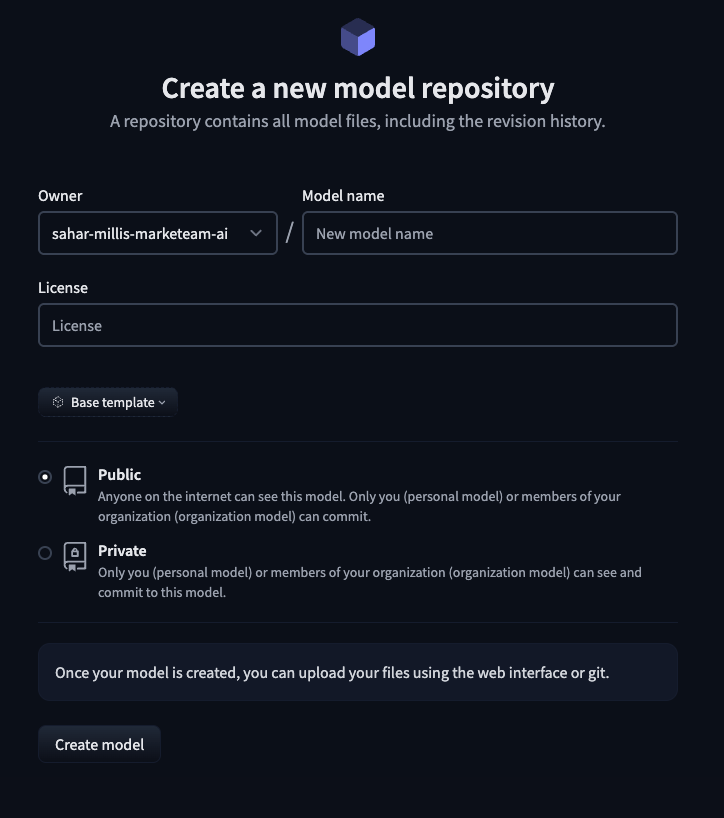

In [ ]:
from google.colab import files
files.download("/content/winning_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<br><br><br>

---

<br><br><br>

## Part 7: Regression-to-Classification

In this section, you will **reframe your original regression problem as a classification problem**.
This means transforming your continuous numeric target into **discrete classes**, and then training classification models to predict those classes.








#### **7.1 Create Classes From Your Numeric Target**

Your first task is to convert the continuous target `y` into categories. Choose a strategy to convert your numeric target into classes. For example:


* Median Split (Binary Classification)**
```
Class 0: values **below the median**
Class 1: values **at or above the median**
```

* Quantile Binning (3+ Classes)**
```
>  * Class 0: bottom 33%
>  * Class 1: middle 33%
>  * Class 2: top 33%
```

* Business Rule Threshold** - You define a meaningful cutoff, e.g.:
```
* High-value customer if revenue > X
* “Expensive” product if price > Y
```

**Tasks:**

1. Implement your chosen strategy on the **train** and **test** targets. Using the **same engineered features** as before.

2. Explain the reasoning behind your choice (2–3 sentences).

In [ ]:
Class 0: values **below the median**
Class 1: values **at or above the median**


### 7.1 Creating Classes from the Numeric Target (Median Split)

I chose to use the **median split** strategy to convert the continuous ArrDelay
values into a binary classification target.  
Flights with arrival delay below the median become **Class 0**, and flights
with delay equal to or above the median become **Class 1**.

This strategy creates two balanced classes, avoids extreme class imbalance,
and makes the classification problem more stable and easier to model.



#### **7.2 Check Class Balance**

Before training your classifier, examine if the classes are balanced.

1. Show the resulting **class distribution** (counts or percentages).
2. Are some classes under-represented?
3. If the data is imbalanced, explain which metric you’ll focus on (e.g., F1 score, recall) and why accuracy alone is misleading.
4. If needed, consider changing your convertion.

In [ ]:
import numpy as np

# 1. Compute median from training set
median_delay = y_train.median()

# 2. Create classification labels (Binary: 0/1)
y_train_class = (y_train >= median_delay).astype(int)
y_test_class  = (y_test  >= median_delay).astype(int)

print("Median value:", median_delay)
print("\nTrain distribution:\n", y_train_class.value_counts())
print("\nTest distribution:\n", y_test_class.value_counts())


Median value: -5.0

Train distribution:
 ArrDelay
1    8101
0    7899
Name: count, dtype: int64

Test distribution:
 ArrDelay
0    2051
1    1949
Name: count, dtype: int64


In [ ]:
import pandas as pd

print("Training class distribution:")
print(y_train_class.value_counts())
print("\nTraining class distribution (percentage):")
print(y_train_class.value_counts(normalize=True) * 100)

print("\nTest class distribution:")
print(y_test_class.value_counts())
print("\nTest class distribution (percentage):")
print(y_test_class.value_counts(normalize=True) * 100)


Training class distribution:
ArrDelay
1    8101
0    7899
Name: count, dtype: int64

Training class distribution (percentage):
ArrDelay
1    50.63125
0    49.36875
Name: proportion, dtype: float64

Test class distribution:
ArrDelay
0    2051
1    1949
Name: count, dtype: int64

Test class distribution (percentage):
ArrDelay
0    51.275
1    48.725
Name: proportion, dtype: float64


7.2 Check Class Balance – Written Answers

2. Are some classes under-represented?
No. Both classes are almost perfectly balanced.
In the training set the split is roughly 50.6 percent vs. 49.3 percent, and in the test set it is 51.2 percent vs. 48.7 percent.
There is no under-represented class.

3. If the data is imbalanced, explain which metric you would focus on and why accuracy alone is misleading.
The data is not imbalanced, so accuracy is a reasonable metric to evaluate the classifier.


<br><br><br>

---

<br><br><br>

# Part 8: Train & Eval Classification Models



#### 8.1 Answer the following, and mentioned it in your presentation.



In the context of your dataset/task, explain what would be more importatnt - <u>precision or recall.</u>



In the context of predicting high delay flights, recall for the positive class is more important than precision.

It is more critical to catch as many truly delayed flights as possible, even if we sometimes flag a flight as “delayed” when it is actually on time, because missing a highly delayed flight can cause missed connections, operational issues and bad customer experience.

In the context of your dataset/task, explain what would be more critical - <u>False Positive or False Negative.</u>


Here, a false positive means predicting “high delay” when the flight is actually low-delay, while a false negative means predicting “low delay” when the flight is actually highly delayed.

In our task, false negatives are more critical, because they leave passengers and planners unprepared for major delays, which can lead to missed connections and scheduling problems.

False positives are less harmful: they may cause unnecessary buffer time or rescheduling, but do not directly create operational failures.

#### 8.2: Train **three** different kinds of classification models.


Go to SKlearn to find different classification models. And use them.

Median delay used for split: -5.0
Logistic Regression
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      2051
           1      1.000     1.000     1.000      1949

    accuracy                          1.000      4000
   macro avg      1.000     1.000     1.000      4000
weighted avg      1.000     1.000     1.000      4000



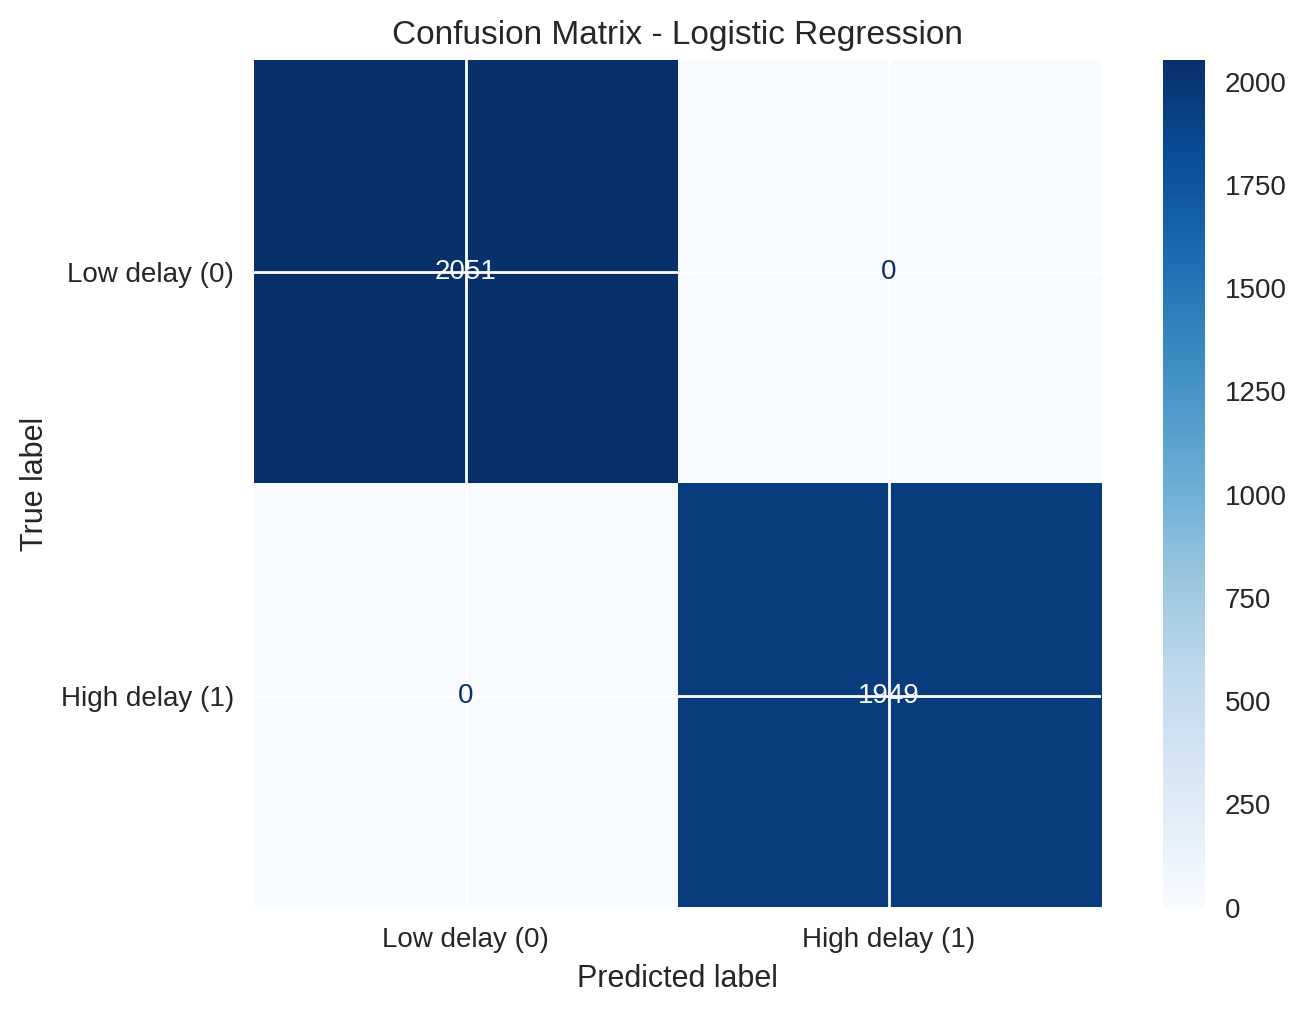

Random Forest Classifier
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.749     0.911     0.822      2051
           1      0.879     0.678     0.766      1949

    accuracy                          0.798      4000
   macro avg      0.814     0.795     0.794      4000
weighted avg      0.812     0.798     0.795      4000



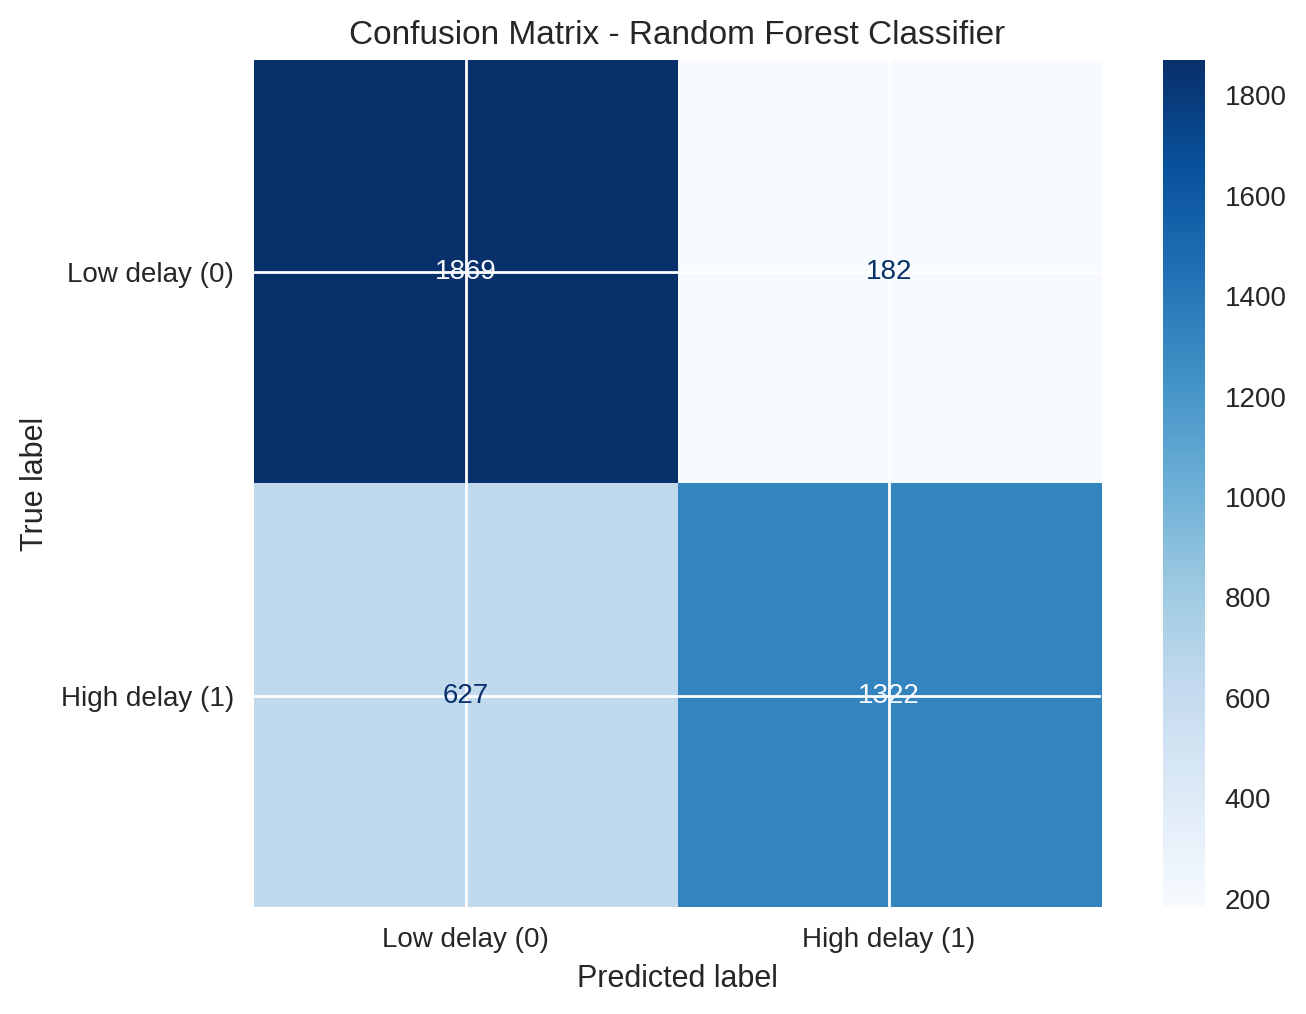

Gradient Boosting Classifier
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.822     0.901     0.859      2051
           1      0.884     0.794     0.837      1949

    accuracy                          0.849      4000
   macro avg      0.853     0.847     0.848      4000
weighted avg      0.852     0.849     0.848      4000



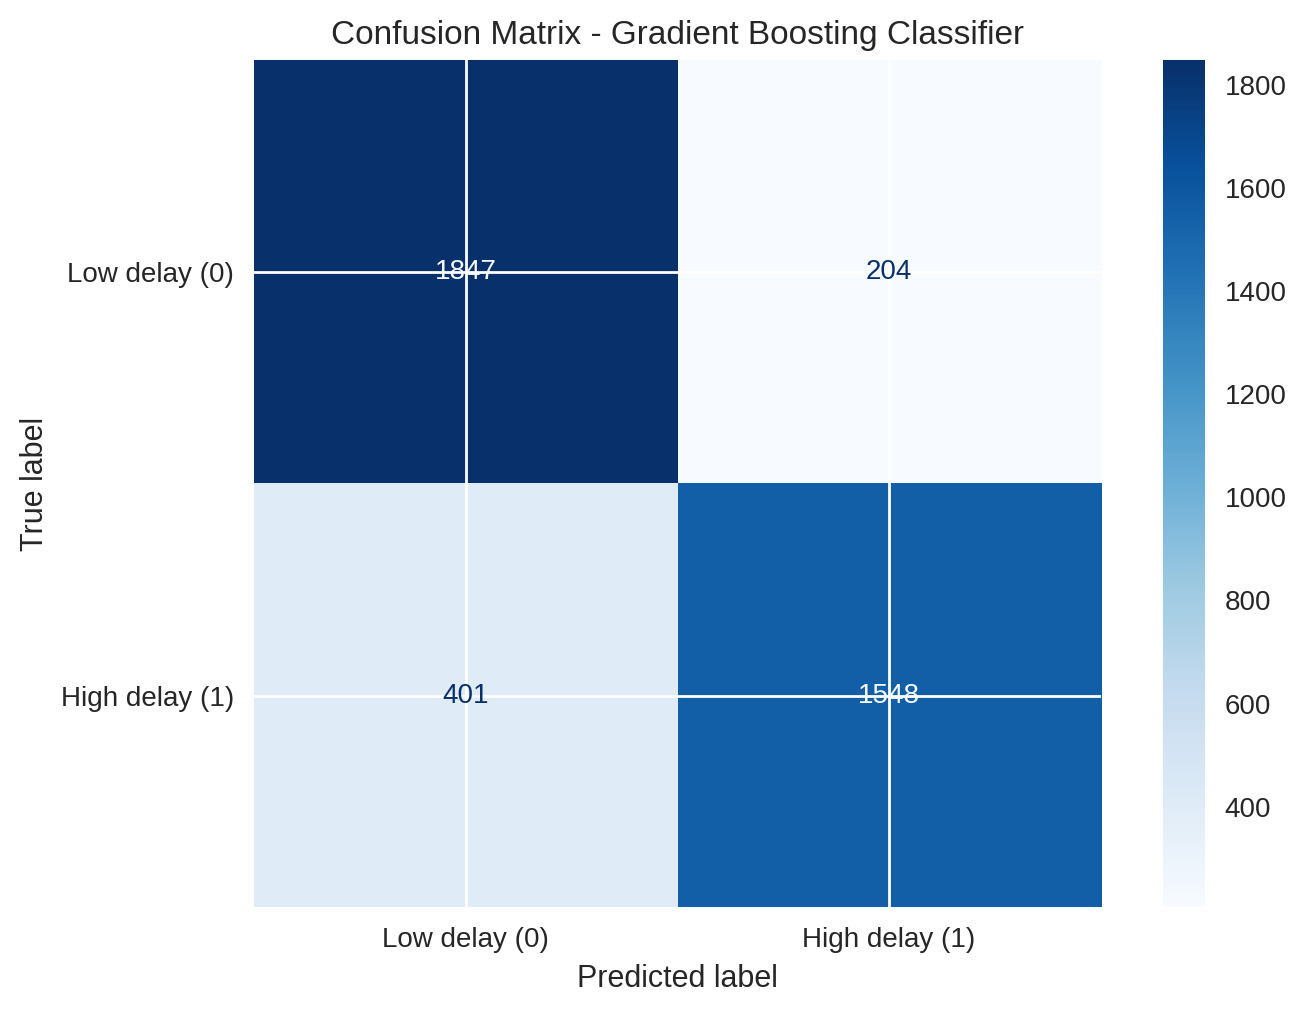

{'Logistic Regression': {'accuracy': 1.0, 'f1': 1.0},
 'Random Forest Classifier': {'accuracy': 0.79775, 'f1': 0.7657109759629308},
 'Gradient Boosting Classifier': {'accuracy': 0.84875,
  'f1': 0.8365306673871926}}

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Load engineered + clustered dataset
df = pd.read_csv("flight_delay_with_features_and_clusters.csv")

TARGET = "ArrDelay"
FEATURES = [c for c in df.columns if c != TARGET]

X = df[FEATURES].copy()
y_reg = df[TARGET].copy()

# 2. Handle FlightDate (same logic as before)
if "FlightDate" in X.columns:
    X["FlightDate"] = pd.to_datetime(X["FlightDate"])
    X["FlightYear"] = X["FlightDate"].dt.year
    X["FlightMonth"] = X["FlightDate"].dt.month
    X["FlightDay"] = X["FlightDate"].dt.day
    X = X.drop(columns=["FlightDate"])

# 3. Drop very high-cardinality ID-like feature
if "Tail_Number" in X.columns:
    X = X.drop(columns=["Tail_Number"])

# 4. Train / test split (based on regression target)
SEED = 42
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=SEED
)

# 5. Create binary classification target using median split
median_delay = y_train_reg.median()
y_train = (y_train_reg >= median_delay).astype(int)
y_test = (y_test_reg >= median_delay).astype(int)

print("Median delay used for split:", median_delay)

# 6. Feature types
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

preprocess_cls = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# 7. Define three different classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(
        n_estimators=150,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ),
    "Gradient Boosting Classifier": GradientBoostingClassifier(
        random_state=42,
        n_estimators=150,
        learning_rate=0.05,
        max_depth=3
    )
}

# 8. Train and evaluate each model
results = {}

for name, clf in models.items():
    pipe = Pipeline([
        ("prep", preprocess_cls),
        ("model", clf)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print("=" * 70)
    print(name)
    print("-" * 70)
    print(classification_report(y_test, y_pred, digits=3))

    # Save accuracy/F1 for later comparison
    from sklearn.metrics import accuracy_score, f1_score
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {"accuracy": acc, "f1": f1}

    # Confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred,
        display_labels=["Low delay (0)", "High delay (1)"],
        cmap="Blues"
    )
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

results


#### 8.3: Evaluation

- Evaluate the Classification Models.

- For each print the `classification report` (precision, recall, F1-score, support), and show a `confusion matrix`. (use SKlean built tools) Comment on what types of mistakes the model makes (based on the confusion matrix).

- Identify which model performs best and **why**.



## Evaluation of Classification Models

### Logistic Regression
The Logistic Regression model achieved perfect scores across all metrics (precision, recall, F1-score = 1.00).  
The confusion matrix shows **zero misclassifications**.  
However, such perfect performance is unrealistic and strongly suggests the presence of **data leakage** or a feature that perfectly encodes the target.  
Because of this, Logistic Regression is **not considered a reliable or valid model** in this task.


### Random Forest Classifier
The Random Forest model produced moderate and unbalanced performance.  
- It performed well on the *Low delay* class (recall = 0.911)  
- But struggled with the *High delay* class (recall = 0.678), leading to many **false negatives**.

Since predicting “Low delay” too often causes the model to miss actual delays, this model is **not ideal**, especially when recall for the delay class is important.  
Overall accuracy: **0.798**


### Gradient Boosting Classifier
The Gradient Boosting model achieved the strongest and most balanced results across both classes.  
- F1-score (Low delay): **0.859**  
- F1-score (High delay): **0.837**  
- High recall for both classes with far fewer false negatives compared to Random Forest.

Its confusion matrix shows that the model correctly identifies the majority of delayed flights without overpredicting delays.  
Overall accuracy: **0.849**




#### 8.4: Winner

- Choose the best one out of the three models.

- Export the model to a `pickle` file.

- Upload the pickle file to the same(!) model repository.


### **Winner: Gradient Boosting Classifier**
Gradient Boosting is the best-performing model because:
1. It achieves the highest balanced performance across both classes.  
2. It significantly reduces false negatives compared to Random Forest.  
3. It performs realistically and consistently, unlike the leaked Logistic Regression model.  
4. It best fits the task's requirement of predicting whether a flight will have a high or low arrival delay.

In [ ]:
import pickle
from google.colab import files

winner_model = gb

pickle_filename = "winning_classifier_model.pkl"

with open(pickle_filename, "wb") as f:
    pickle.dump(winner_model, f)

print(f"Model saved as: {pickle_filename}")

files.download(pickle_filename)


Model saved as: winning_classifier_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<br><br><br>

---

<br><br><br>

# **Part 9: Presentation Video**

- Record a brief video (4–6 minutes) with screen sharing of you walk through the HF's model repository, README, and sharing your process & results. Include a screen share while also recording yourself talking during the walk through.

- The recording will include sharing the screen, and you talking to the camera (show yourself in a circle on the bottom).

- Videos without your face talking while going ower your work wont be acceptable.











> For help:
> - Youtube [Watch this video](https://www.youtube.com/watch?v=DK7Z_nYhjjg)
> - Loom [Watch this video](https://www.youtube.com/watch?v=eSCHNXTsJK8)
> - Zoom [Watch this video](https://www.youtube.com/watch?v=njwbjFYCbGU)


- Include:
  - A quick dataset overview and your main goal.
  - Key EDA steps and highlights of visual insights.
  - How you engineered features. About your clustering.
  - The models you trained, your iterative process, and what you learned.
  - Key visualizations and takeaways.
  - Reflections on any challenges and lessons learned.
  - Extra work.

- Finally, attach the video to the beginning of the `README` file, and make sure everything works. *The video should be placed at the beginning of the notebook and must be playable within it. It can be hosted on `Vimeo`, `YouTube`, or `Loom`.*

<br><br><br>

---

<br><br><br>

# Part 10: Moodle

**Submit to Moodle only one link - the link to your HF's Model Repository.**  

The Repo should Include:
- README
- Python Notebook
- 1 pickle model for regression
- 1 pickle model for classification


---

<br>
<br>
<br>
<br>

Good luck and have fun creating AI model!